In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ,normalize
from sklearn.decomposition import PCA

# About the dataset:
* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [248]:
df=pd.read_csv('Marketing_data.csv')
df
#we have 8950 customers,18 features 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [249]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Dealing with missing values:

In [19]:
df.isnull().any().any()

True

In [194]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [258]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].replace(np.nan,df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].replace(np.nan,df['MINIMUM_PAYMENTS'].mean())
df.drop("CUST_ID",axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [62]:
#check for duplicated credit card before dropping CUST_ID column
df.duplicated().sum()

0

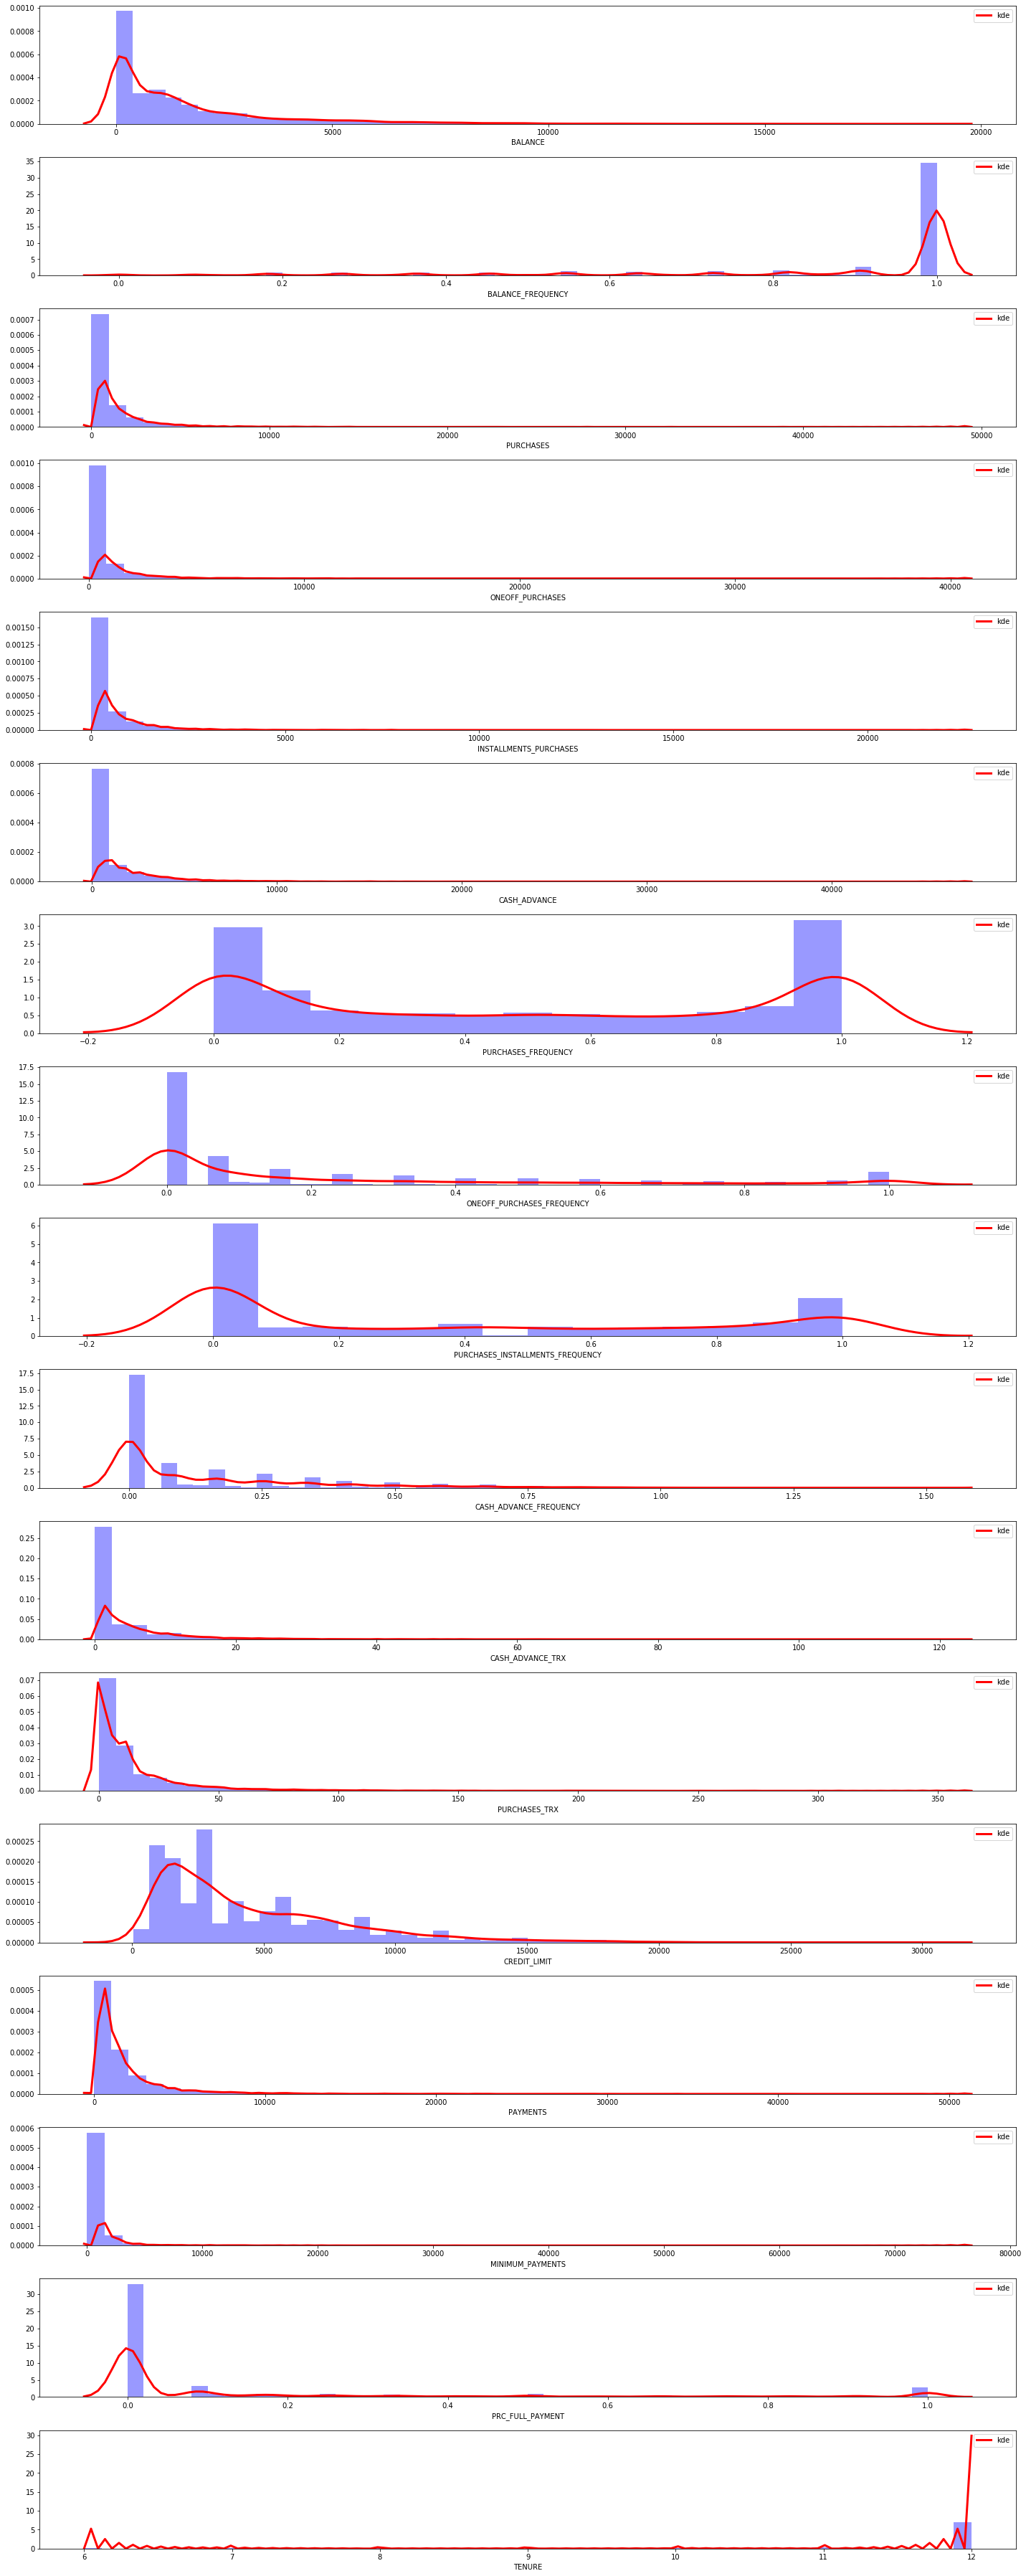

In [47]:
#Distplot combines the matplotlib.hist function with seaborn kdeplot()
plt.figure(fig)
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'kde'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
    

*The histogram is in blue color, and kde in red color
- The mean balance is ~1500,most customers are around that mean
- The balance frequency for most customers is around 1 which means they use their credit card frequently
- The purchases are around the mean ~1000
- Concerning purchases_frequently we have 2 clusters of customers:one of them use credit card frequently ,the other don't
- Not a lot of customers do the oneoff_purchases_frequency same for cach_advance_frequency
- Most customers don't do the full payment


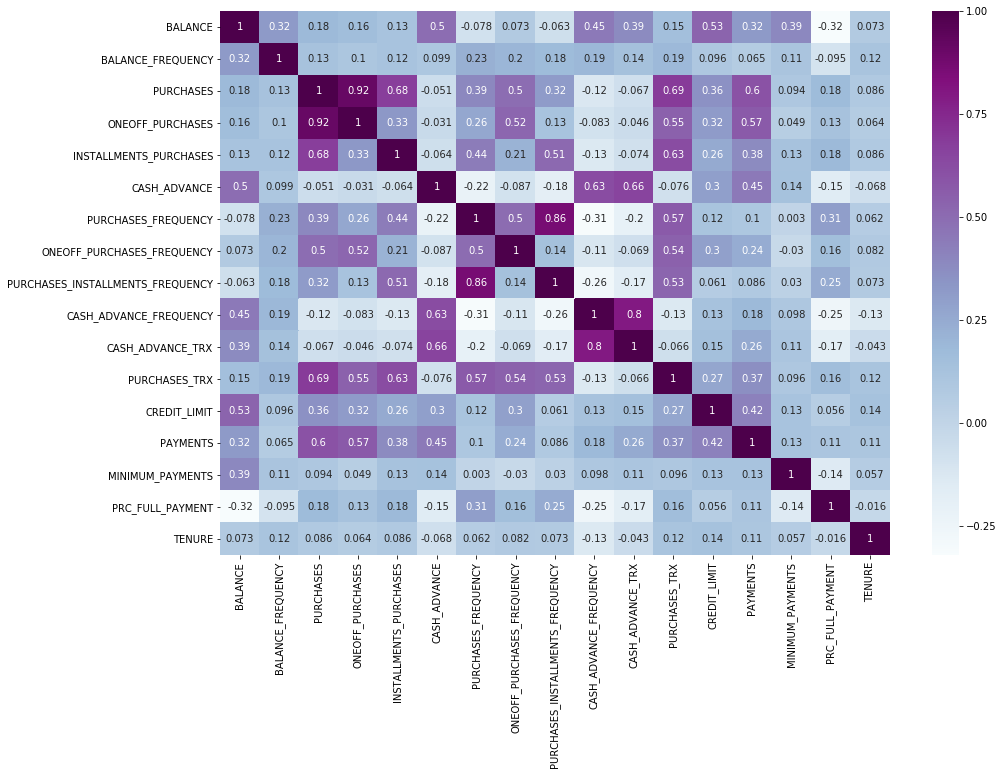

In [163]:
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True,cmap="BuPu")
plt.show()
f.savefig('corr.png')


we notice that:
- 'PURCHASES' have strong correlation with one-off purchases, 'installment purchases, purchase trx, credit limit and payments. 
- 'PURCHASES_FREQUENCY' is highly correlated with  'PURCHASES_INSTALLMENT_FREQUENCY'

# K-means:
First well apply elbow method to find the optimal number of clusters

In [259]:
scaler=StandardScaler()
df_scale=scaler.fit_transform(df)
df_scaled=pd.DataFrame(data= df_scale,columns=[df.columns])
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-5.366135e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [253]:
from sklearn.cluster import KMeans
data=df_scaled.values
score=[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i,random_state=0).fit(data)
    score.append(kmeans.inertia_)
score

[152150.00000000003,
 127784.87449145077,
 111986.3661629119,
 99073.93826774822,
 91502.1394097151,
 84850.98165827329,
 79532.40237691787,
 75568.75961699065,
 69954.86482342934,
 67546.56302862815,
 64196.290570584766,
 61356.154241620294,
 59153.013507934666,
 57496.219950648476,
 55910.743148035566,
 54268.613701492075,
 52994.941256395214,
 51653.552401936955,
 50374.5476243891]

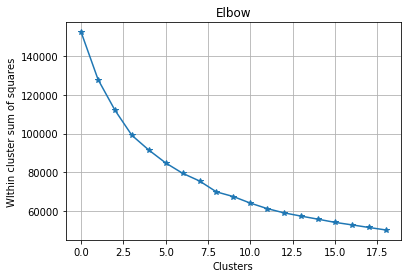

In [254]:
plt.plot(score,marker='*')
plt.grid()
plt.xlabel('Clusters')
plt.ylabel('WIthin cluster sum of squares')
plt.title('Elbow')
plt.show()


The value of score start descreasing linearly starting 8th cluster
from the plot we choose 8 as the optimal number of clusters in this case

In [255]:
kmeans= KMeans(n_clusters=8,random_state=0).fit(df_scaled)

In [260]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.025057,0.402221,-0.362471,-0.241863,-0.412586,-0.076715,-0.893714,-0.403897,-0.792979,0.134020,-0.010260,-0.493878,-0.293240,-0.244150,-0.004657,-0.453067,0.270573
1,0.764239,0.472814,2.062716,1.730076,1.698851,-0.211460,1.154694,1.735392,1.074662,-0.308501,-0.226207,2.436974,1.164081,1.137954,0.330154,0.215231,0.316885
2,-0.689835,0.137606,0.145095,0.012721,0.319235,-0.448972,0.914685,0.369082,0.735900,-0.643116,-0.458479,0.239867,0.142993,-0.106374,-0.292184,2.164495,0.189287
3,1.684676,0.393129,-0.212280,-0.145796,-0.234138,2.045163,-0.460612,-0.170545,-0.422723,1.941318,1.967343,-0.259923,1.029759,0.838132,0.542094,-0.391229,0.065647
4,-0.699832,-2.199888,-0.322797,-0.242849,-0.316951,-0.314584,-0.580570,-0.458343,-0.452526,-0.512164,-0.369379,-0.428460,-0.197611,-0.208295,-0.253704,0.113443,0.195591
5,-0.156436,0.398347,0.039783,-0.049160,0.184299,-0.323514,0.926461,0.251972,0.831684,-0.390876,-0.313661,0.246681,-0.175812,-0.160670,0.009826,-0.336404,0.289302
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.332825,-0.344129,-0.287118,-0.205018,-0.301852,0.072498,-0.196537,-0.269970,-0.234654,0.313908,0.002881,-0.385982,-0.563404,-0.392199,-0.205867,-0.035486,-3.194122


In [262]:
cluster_centers_reverse = scaler.inverse_transform(cluster_centers)
cluster_centers_reverse = pd.DataFrame(data = cluster_centers_reverse, columns = [df.columns])
cluster_centers_reverse

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1616.629173,0.972553,228.779106,190.993828,37.971183,817.995180,0.131660,0.081967,0.049287,0.161963,3.178813,2.433884,3427.523166,1026.352163,853.354117,0.021200,11.879414
1,3155.174538,0.989276,5410.228755,3464.009963,1947.317692,535.429711,0.953785,0.720159,0.791535,0.073410,1.705128,75.283883,8729.853480,5027.410361,1633.615922,0.216666,11.941392
2,128.640758,0.909868,1313.203376,613.551093,699.747653,37.355824,0.857458,0.312562,0.656903,0.006450,0.120043,20.672026,5014.715483,1425.202238,183.285042,0.786792,11.770632
3,5070.985611,0.970399,549.666157,350.446486,199.339142,5267.673989,0.305485,0.151581,0.196437,0.523622,16.674501,8.249119,8241.133426,4159.454373,2127.533210,0.039287,11.605170
4,107.833093,0.356138,313.544857,189.357639,124.452692,319.174683,0.257340,0.065725,0.184592,0.032655,0.728086,4.059928,3775.460147,1130.151571,272.960088,0.186895,11.779070
5,1238.866994,0.971635,1088.201211,510.841449,577.727358,300.448124,0.862184,0.277626,0.694970,0.056926,1.108318,20.841408,3854.772820,1268.019058,887.105187,0.055322,11.904479
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2444.556993,597.766825,384.441450,0.143336,7.242765


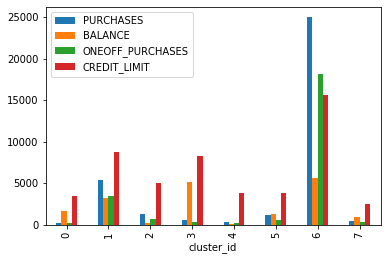

In [264]:
df['cluster_id'] = kmeans.labels_
df[['cluster_id','PURCHASES','BALANCE','ONEOFF_PURCHASES','CREDIT_LIMIT']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()


cluster6(big spenders):use credit card more,do lot of puchases ,
cluster 3: have high balance after big spenders 
cluster 0&7:doesn't use their credit card much
cluster 4&3: have the lowest balance,careful with their money

In [214]:
df_cluster=pd.concat([df,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster number
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


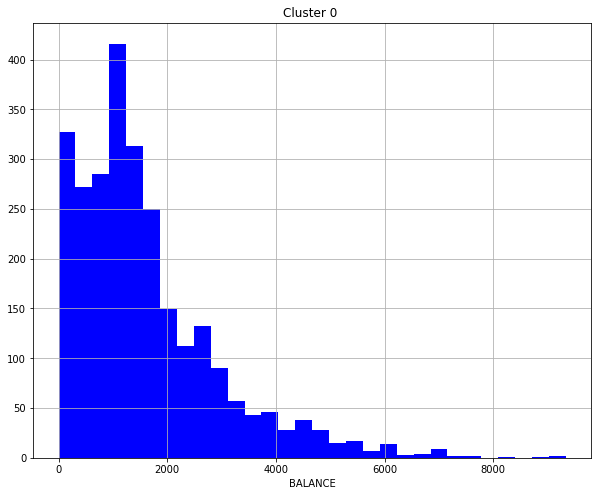

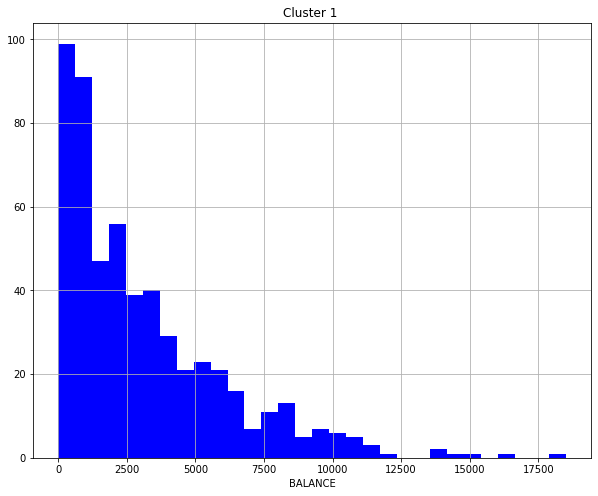

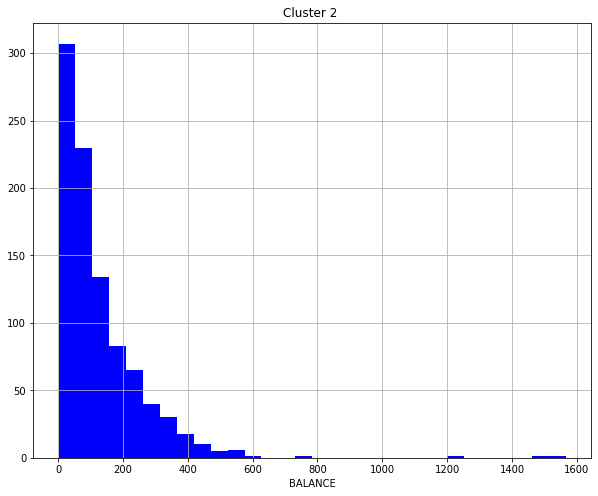

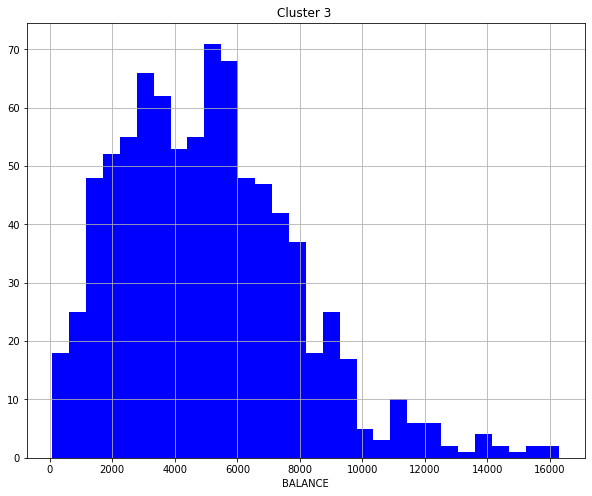

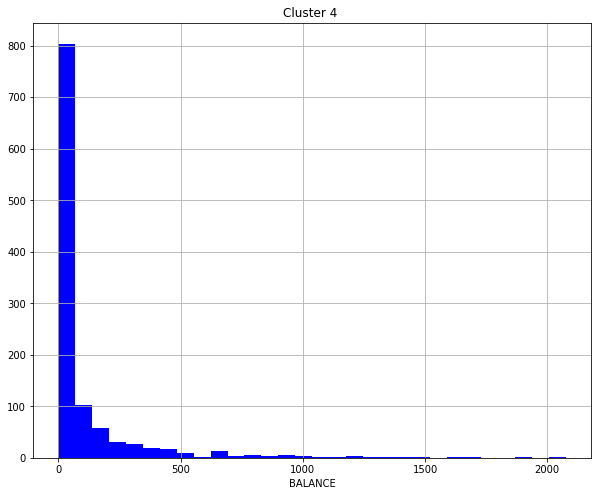

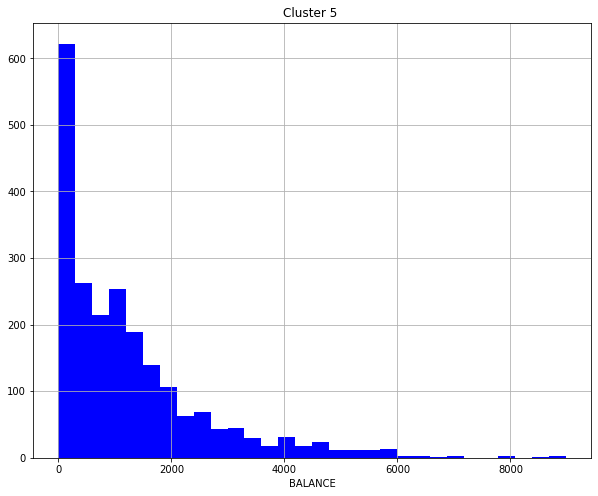

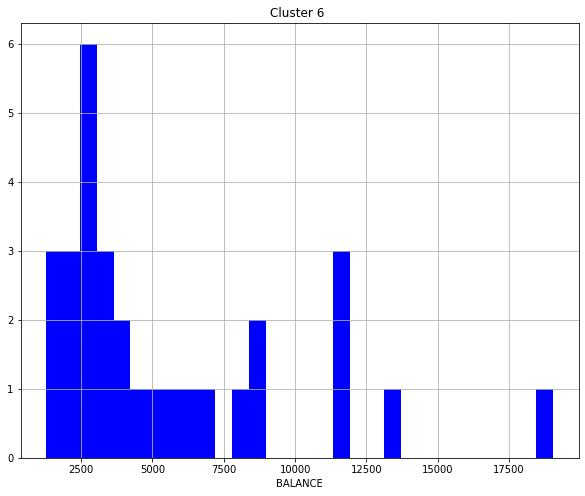

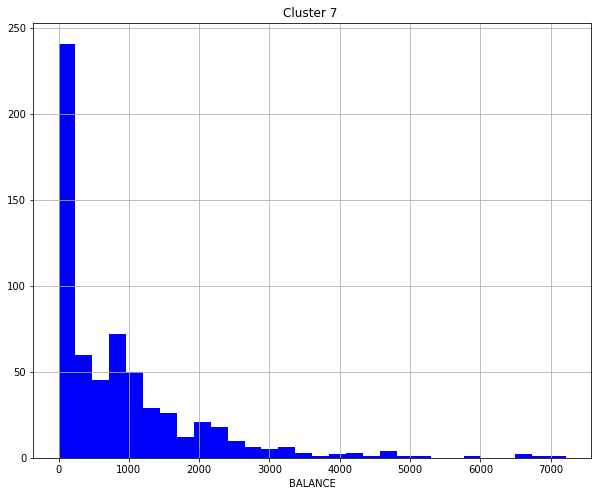

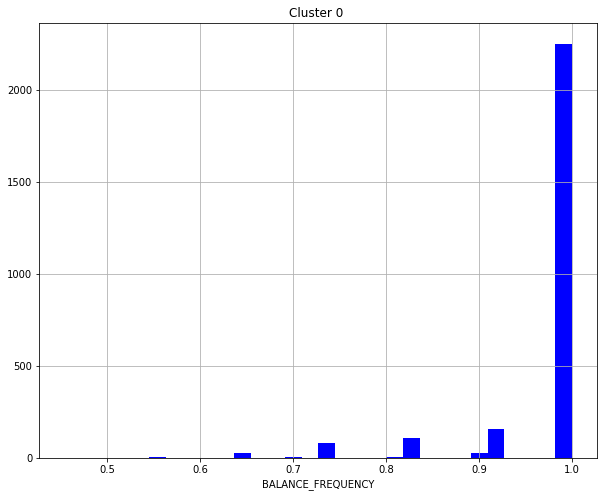

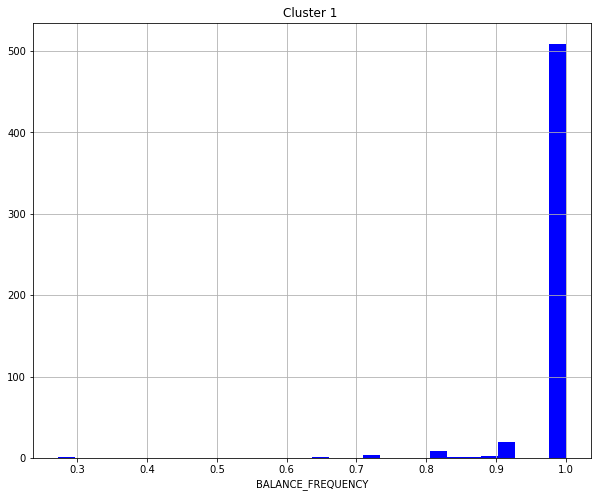

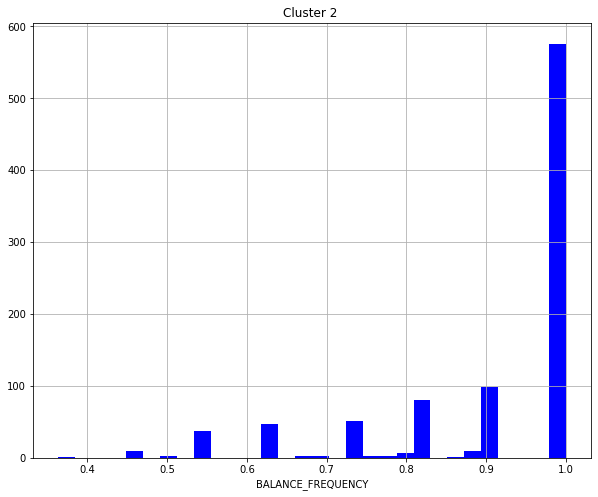

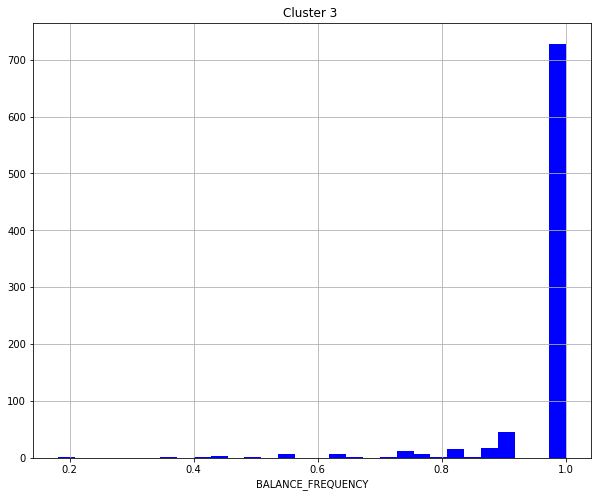

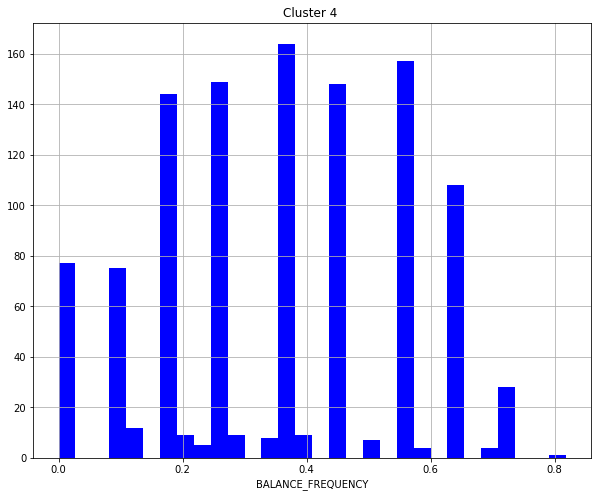

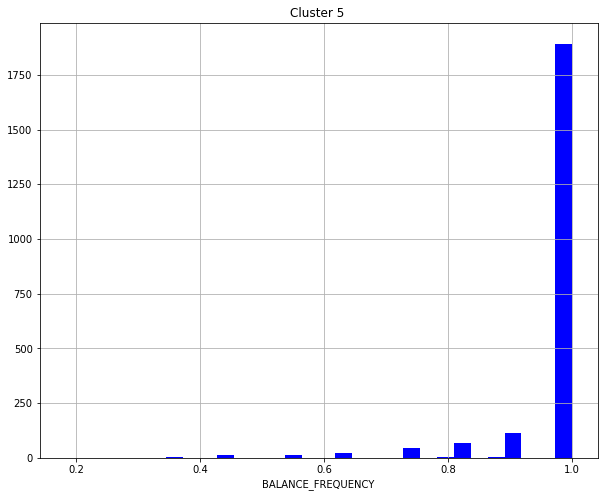

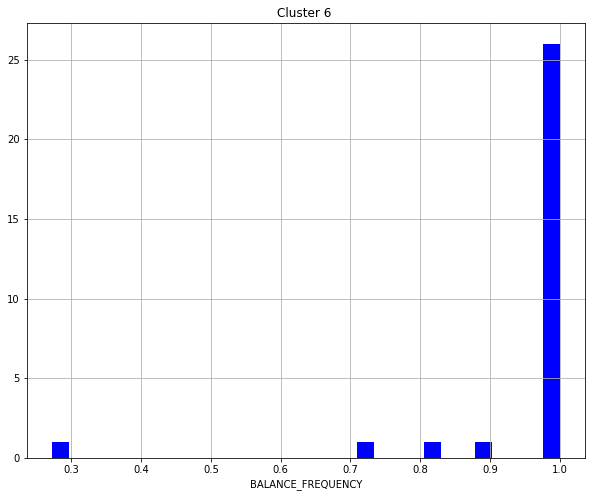

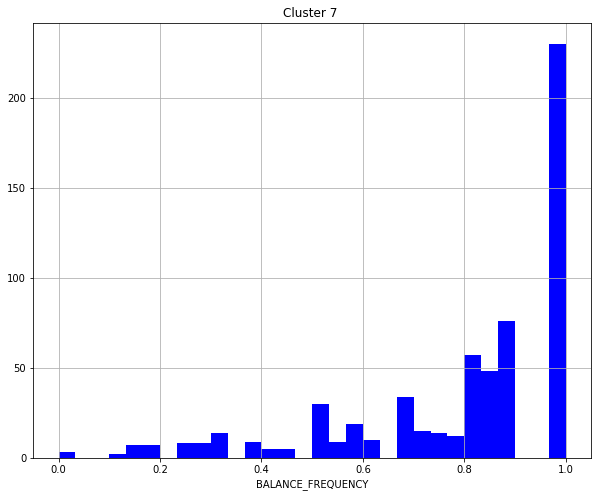

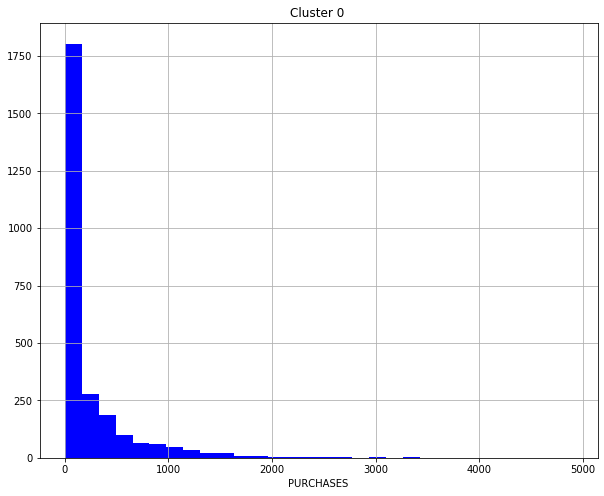

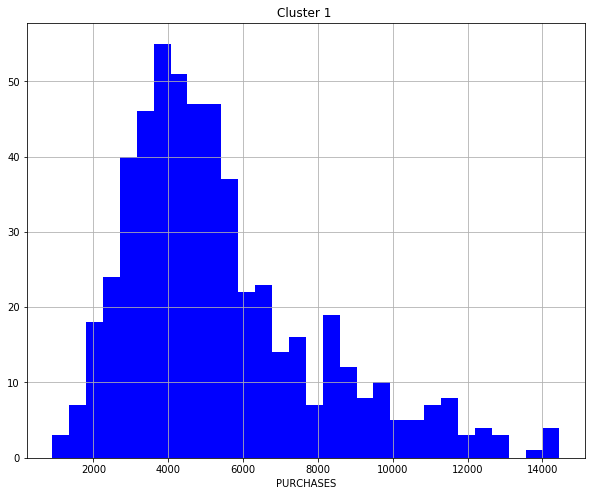

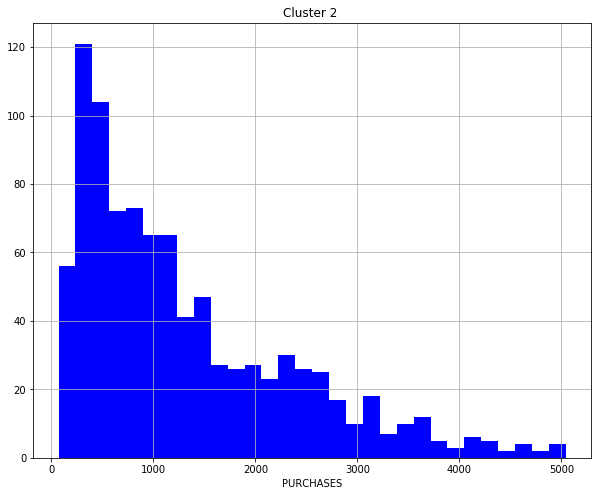

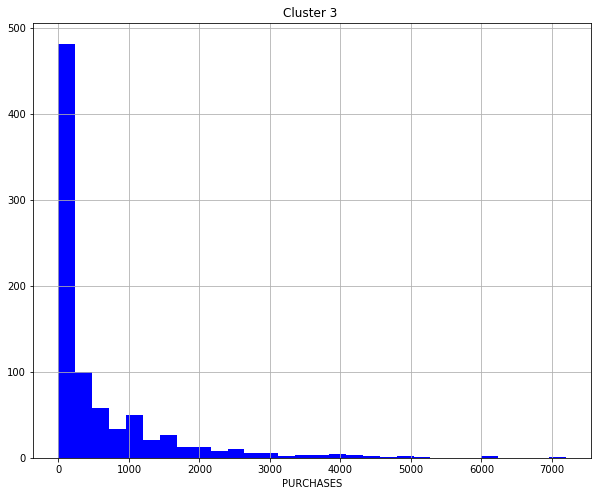

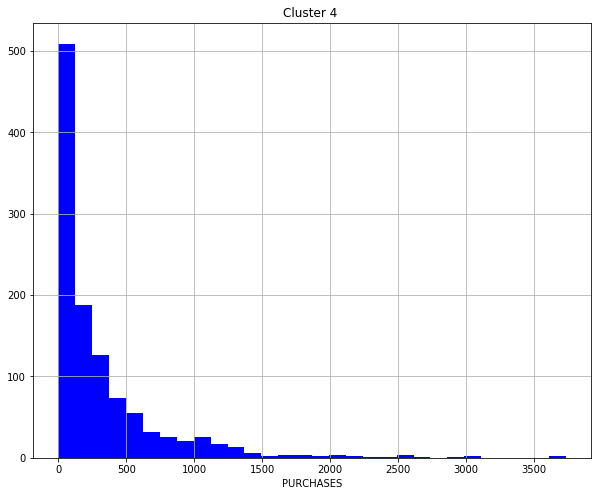

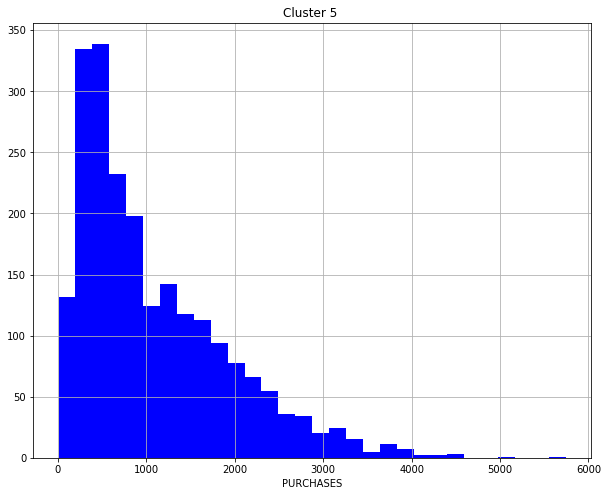

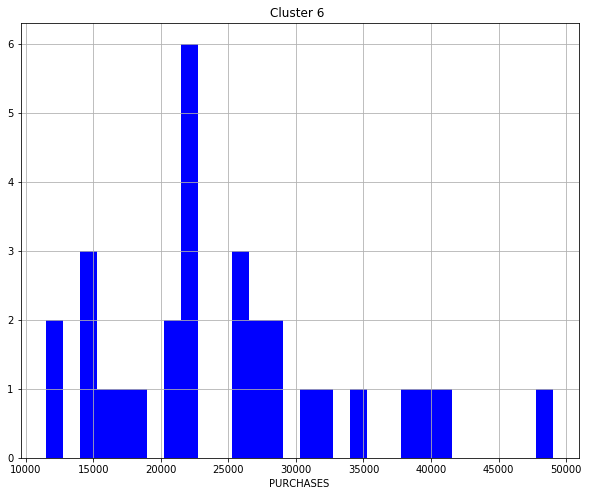

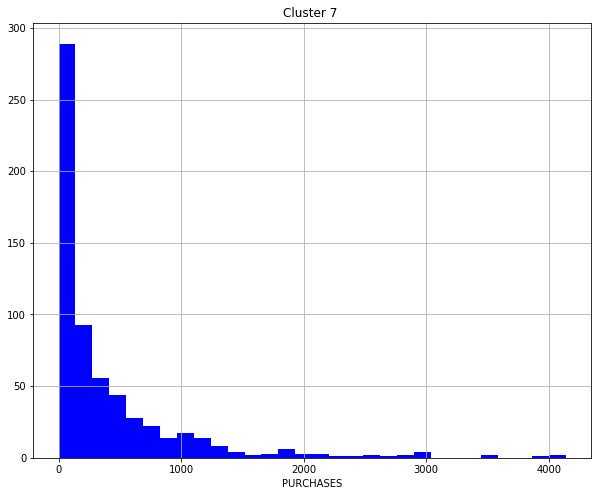

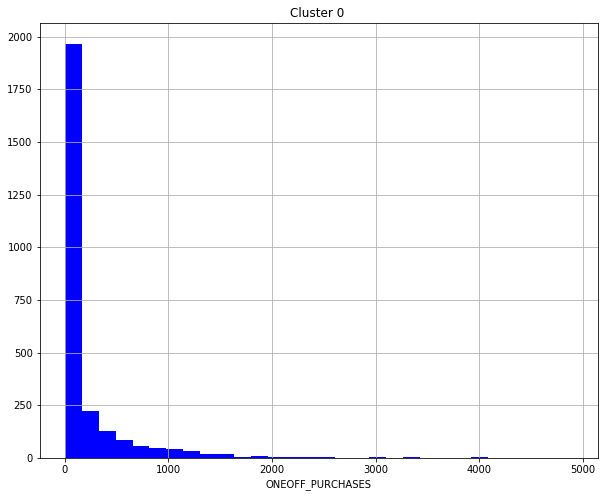

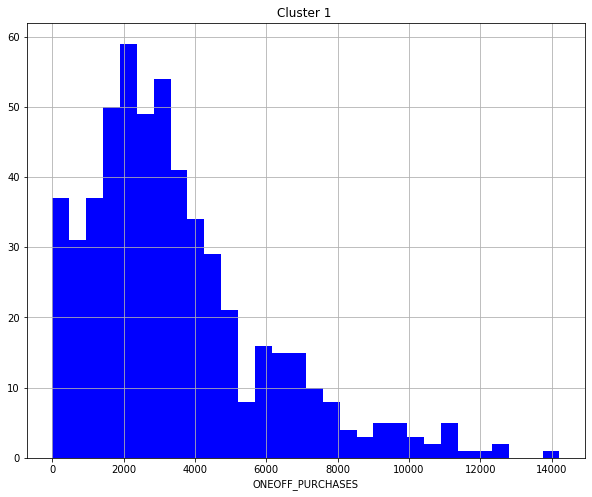

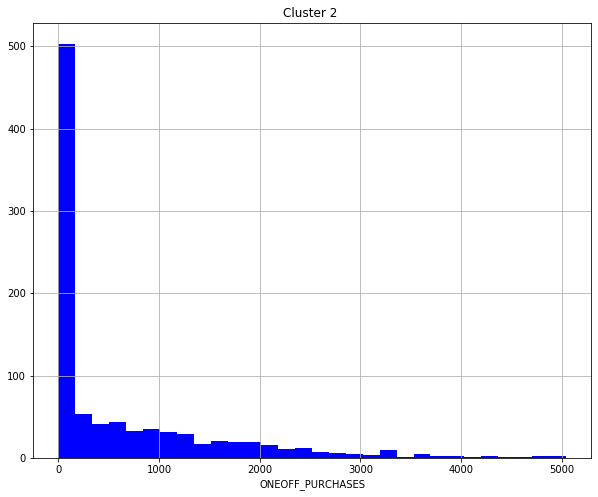

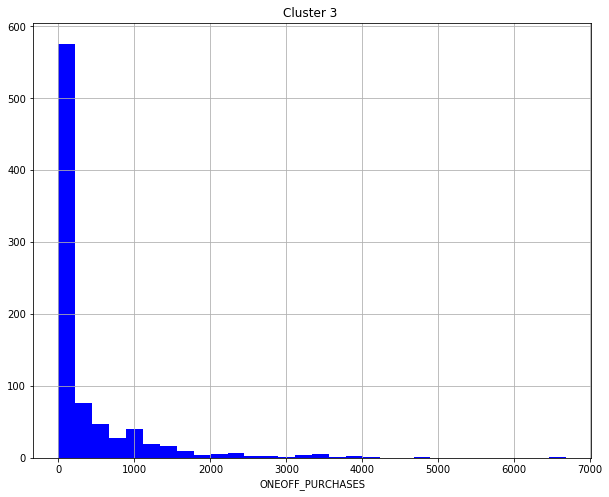

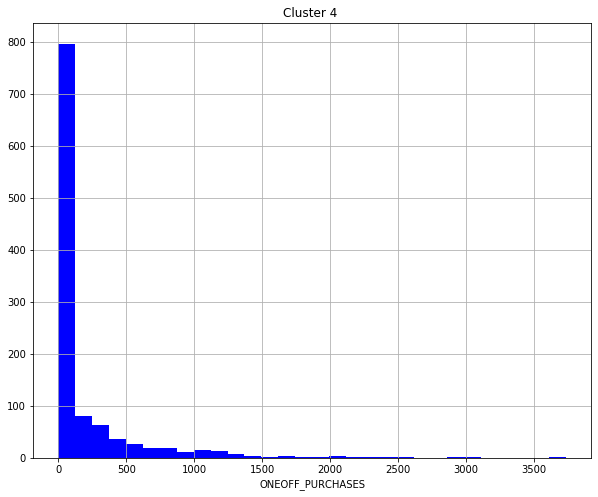

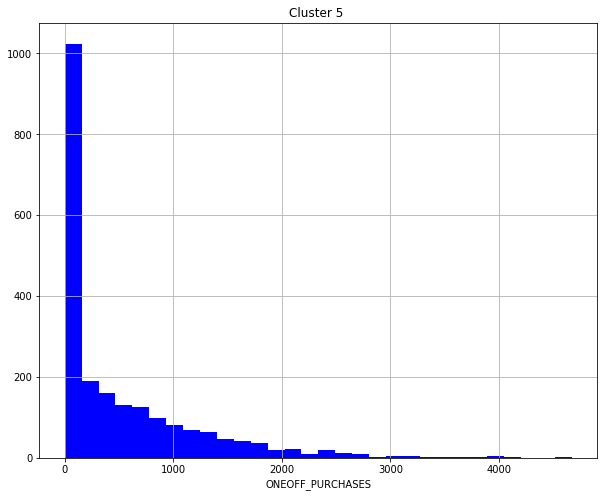

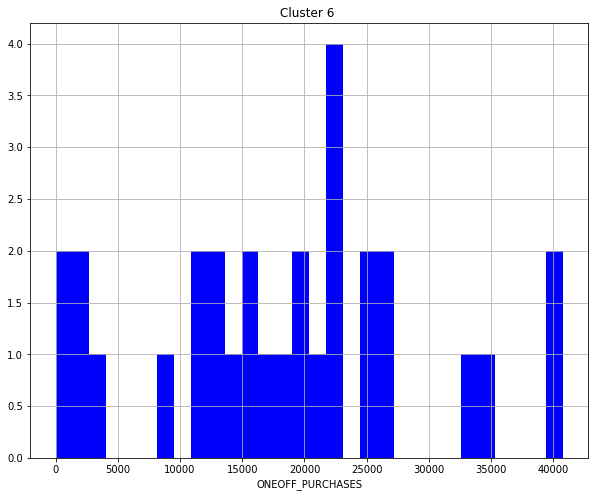

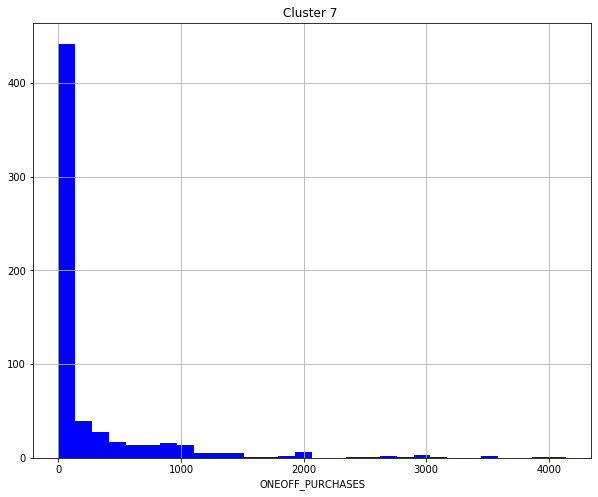

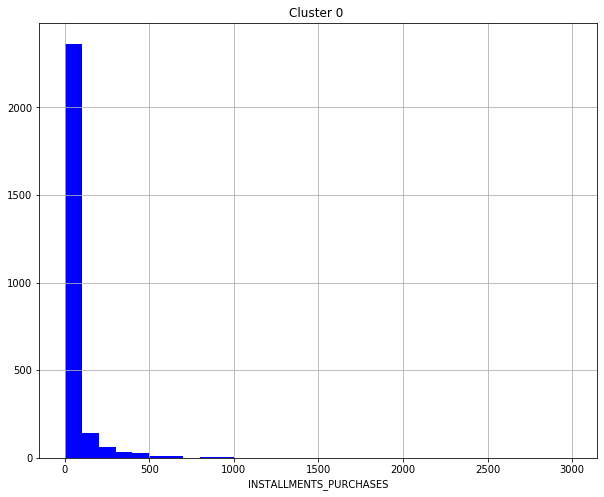

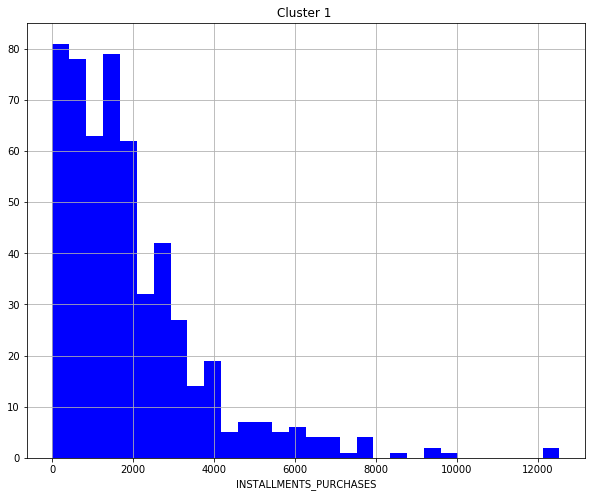

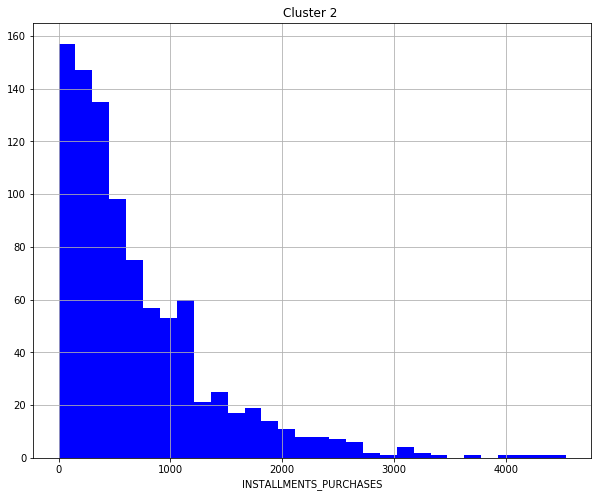

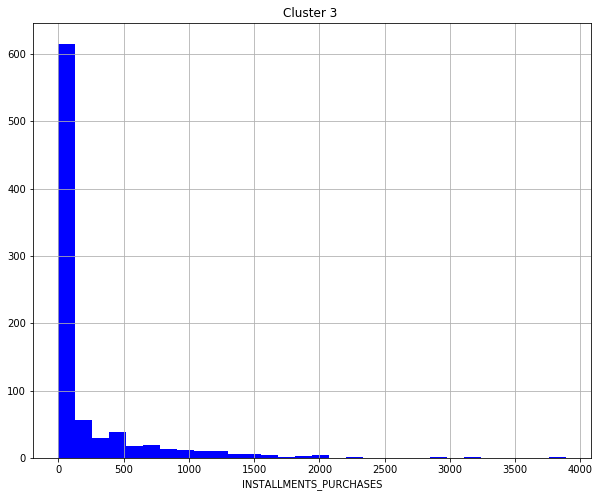

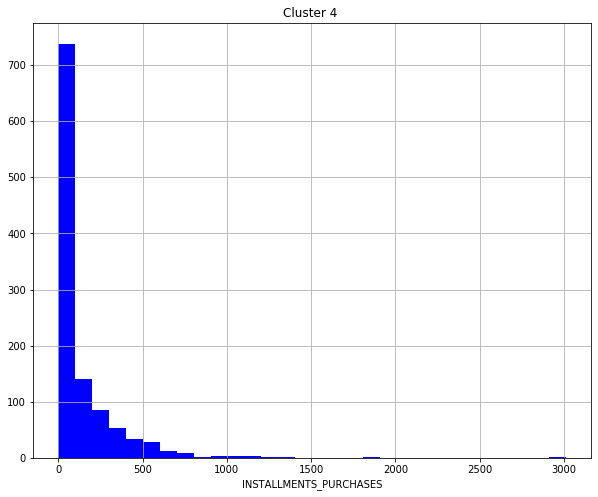

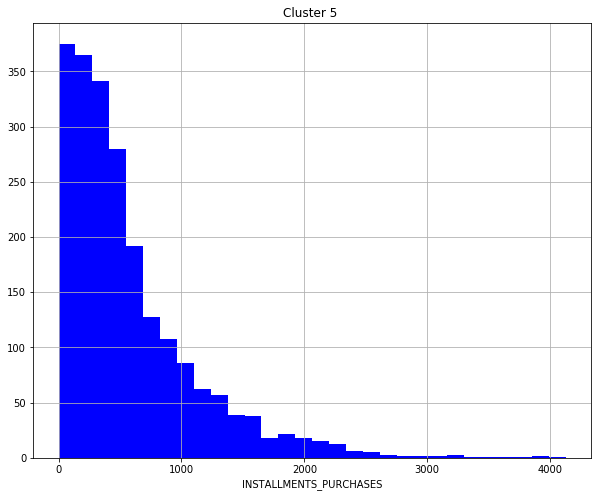

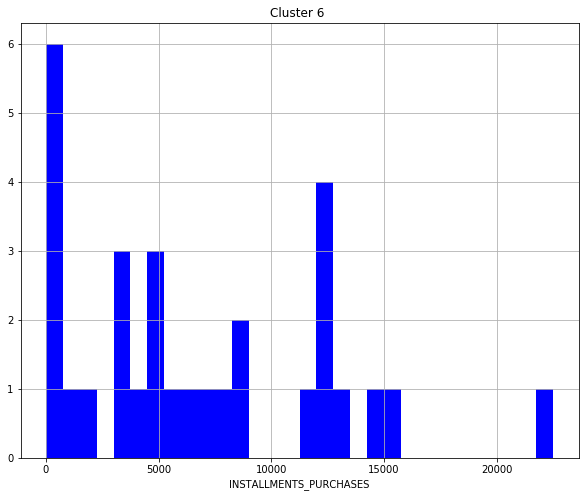

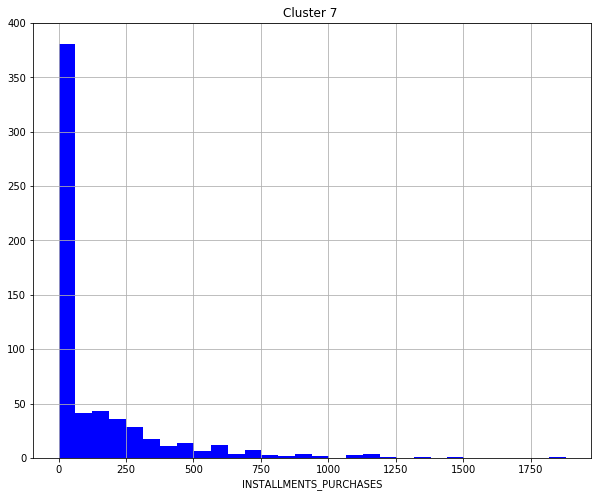

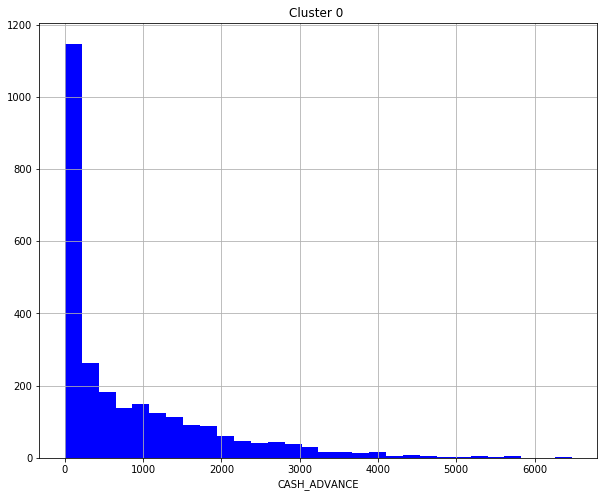

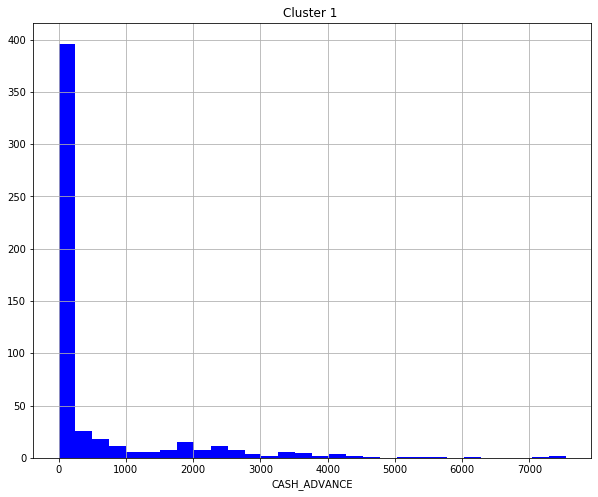

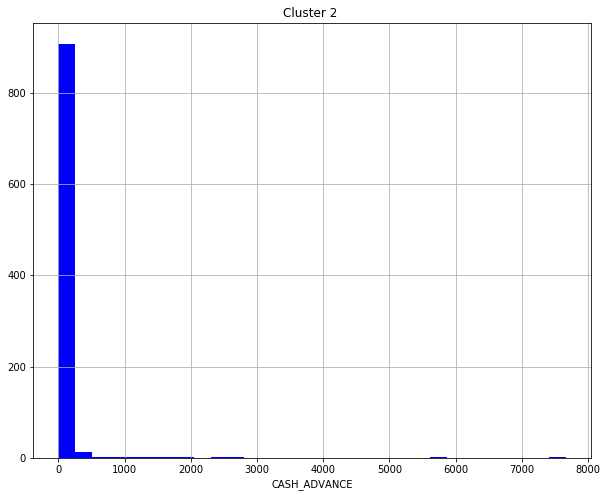

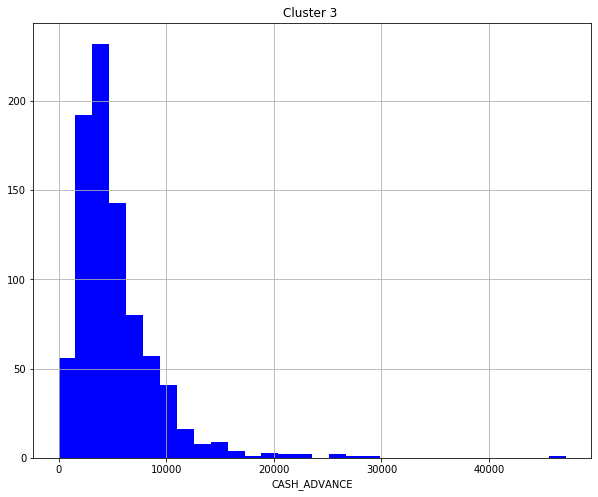

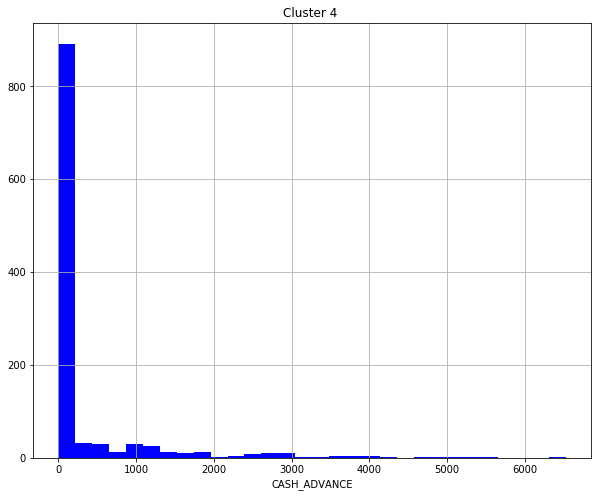

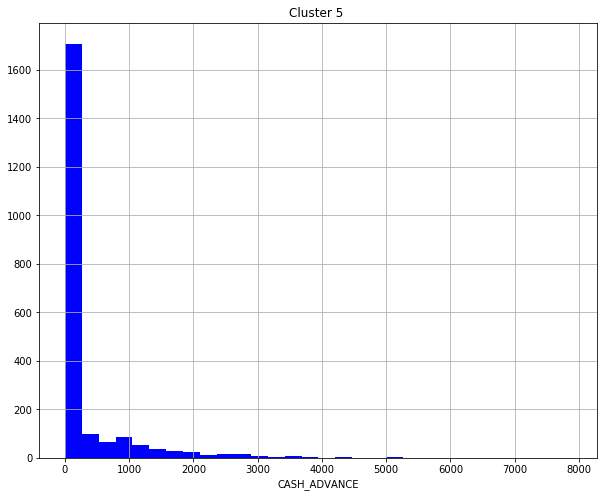

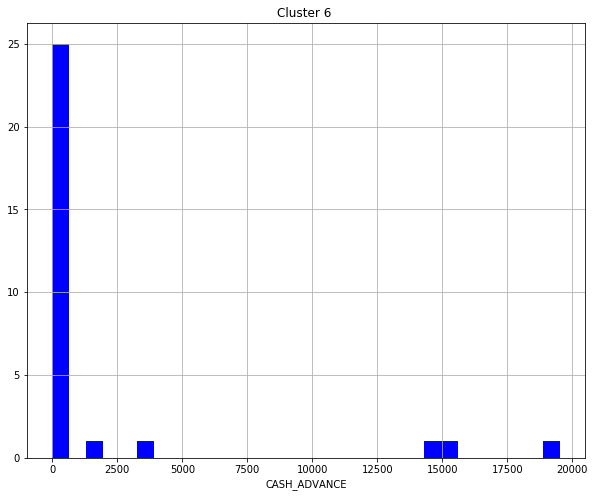

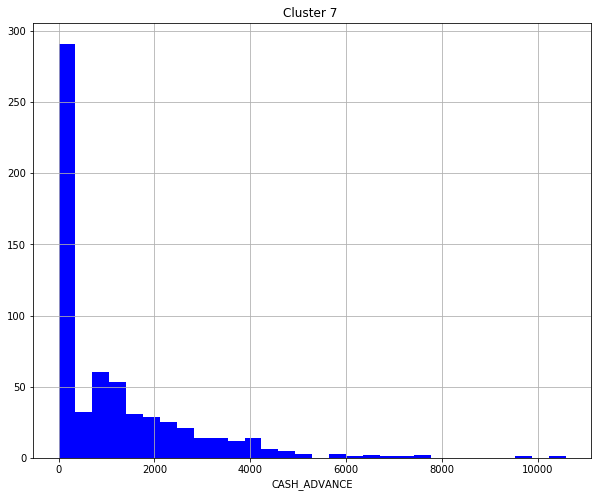

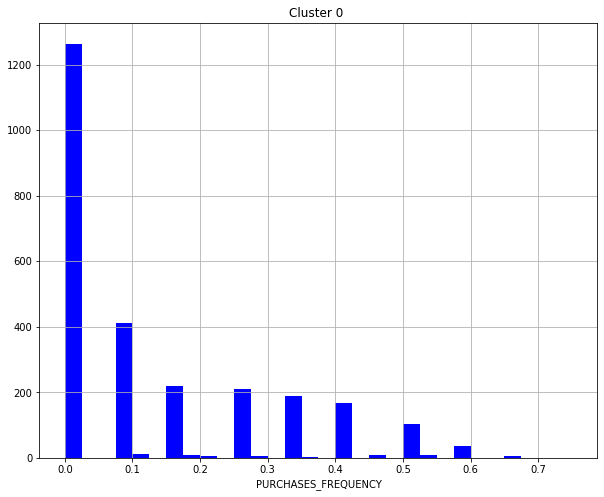

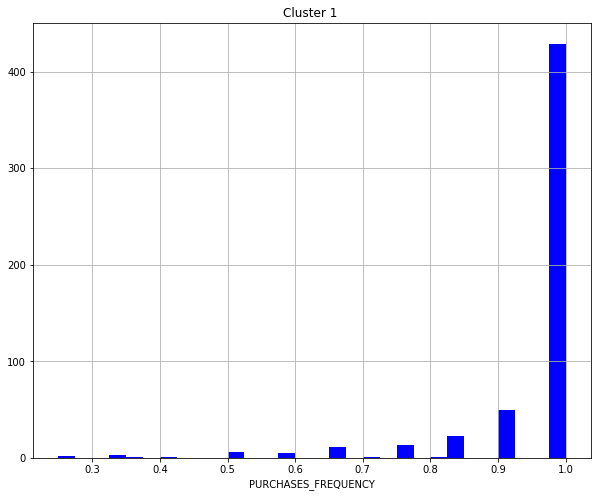

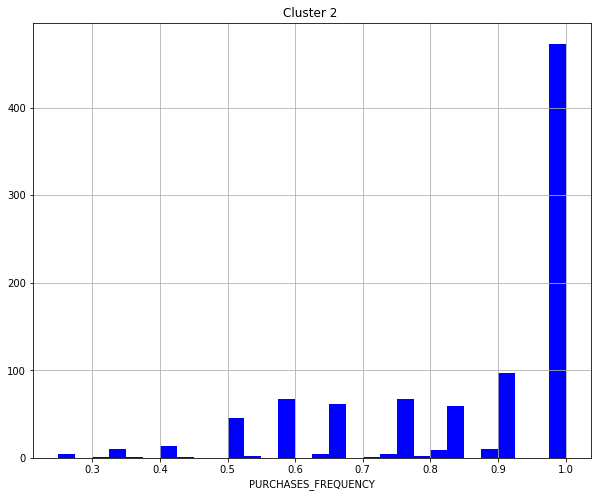

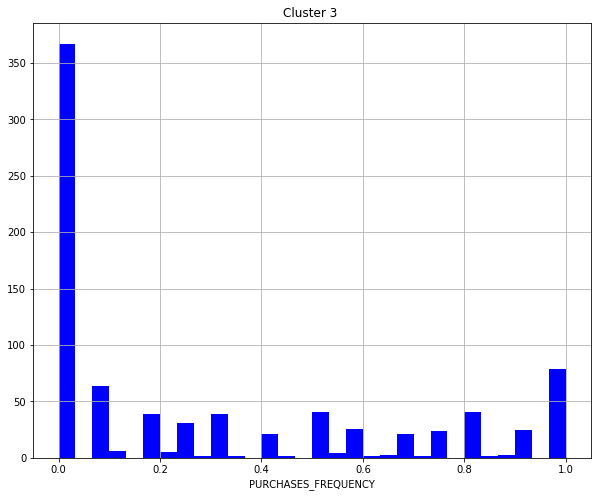

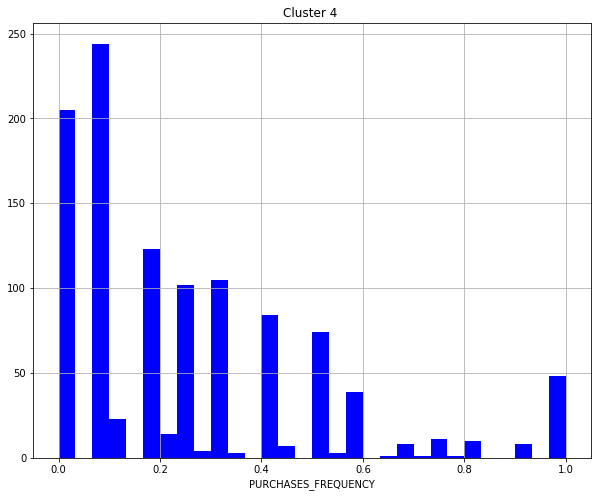

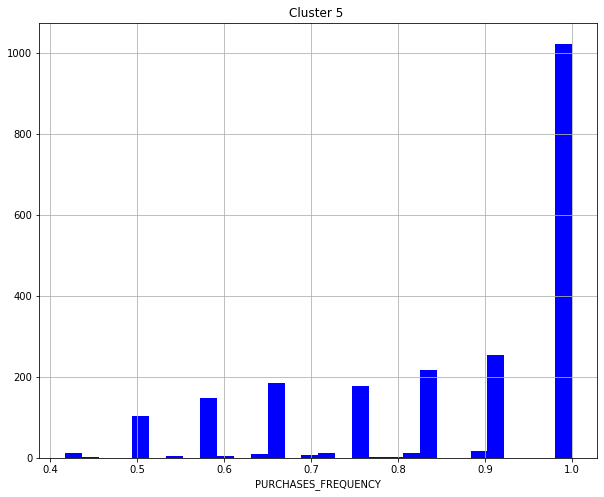

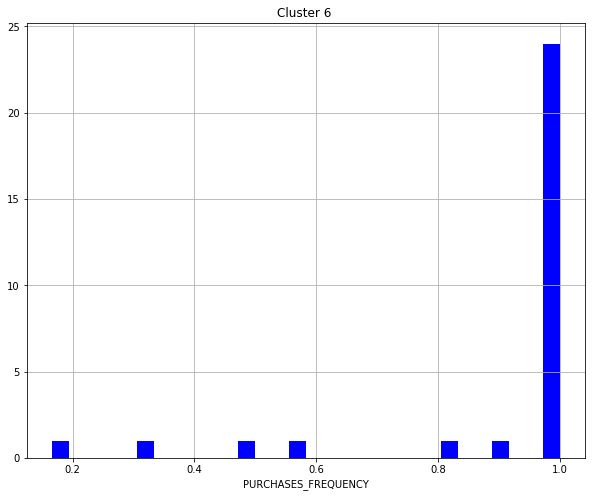

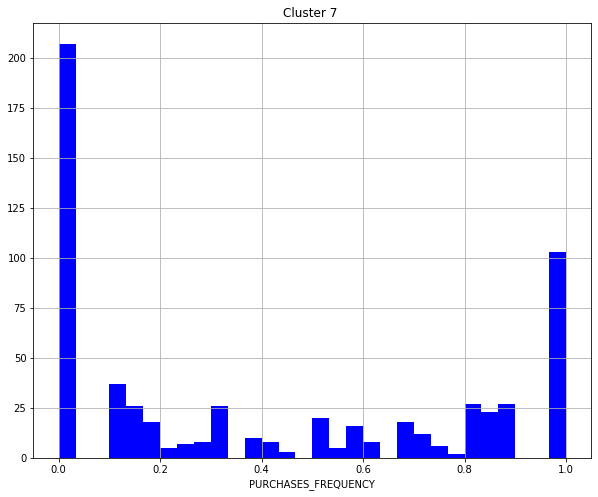

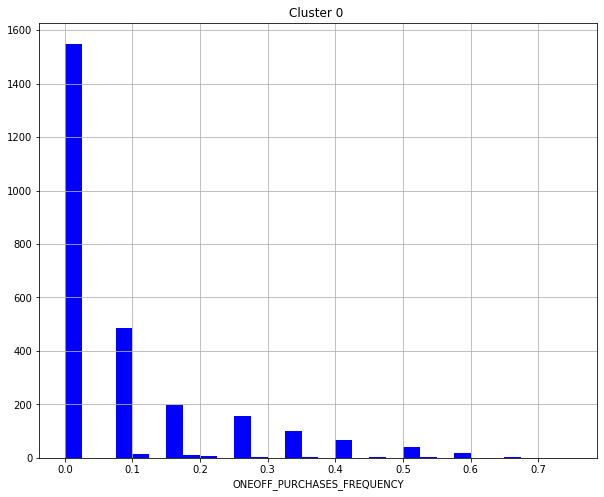

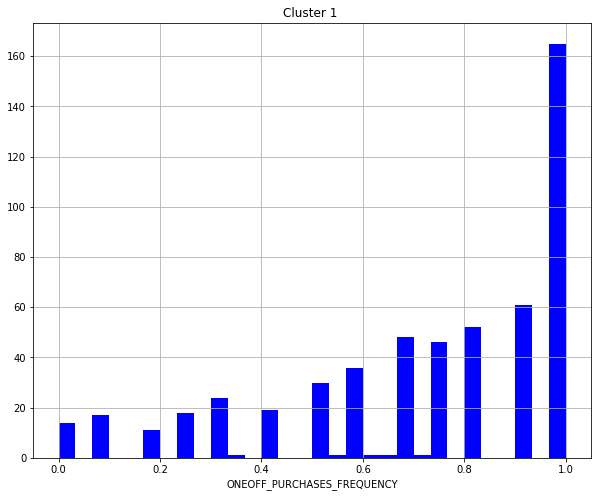

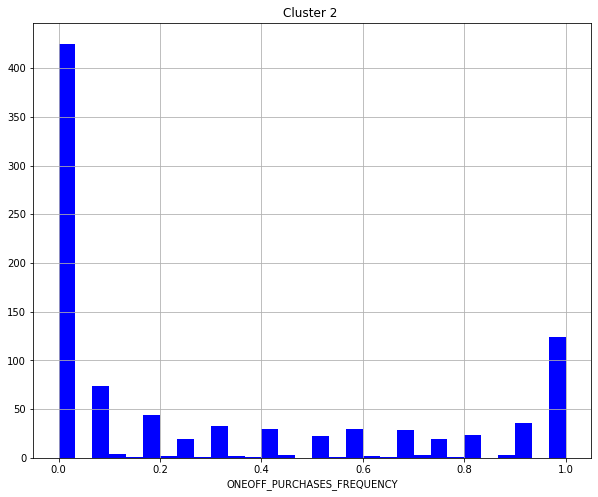

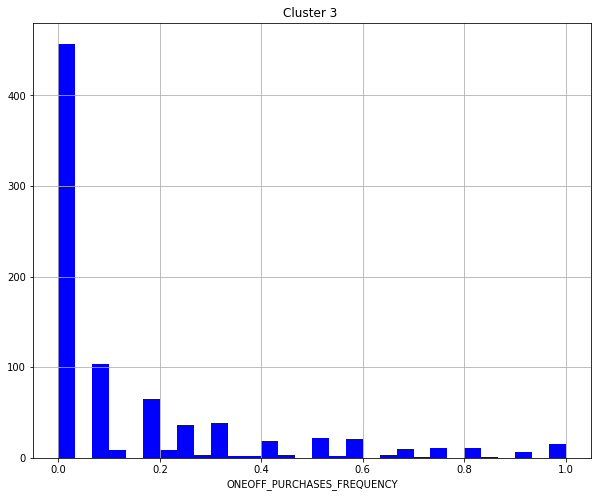

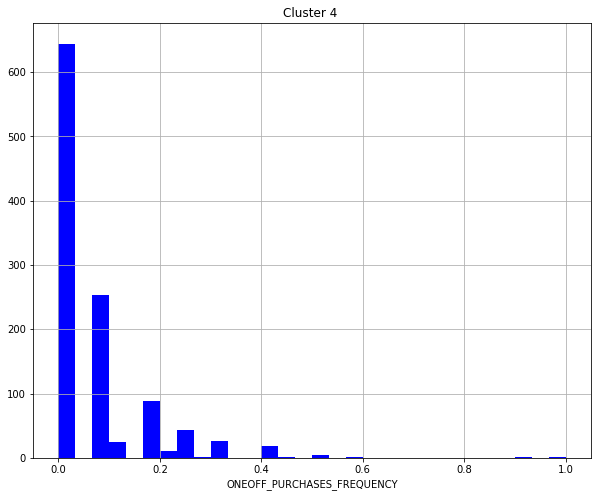

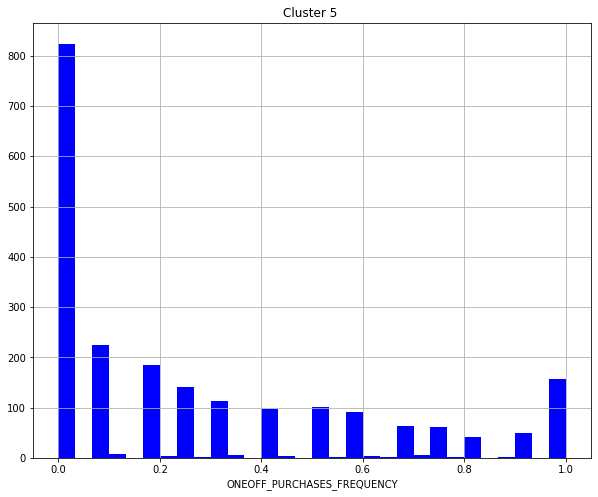

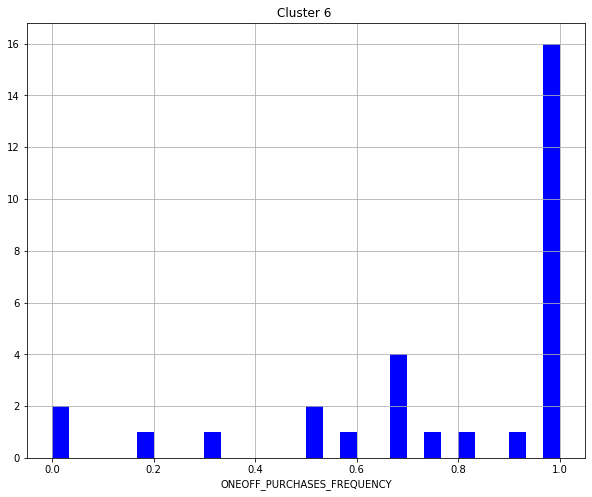

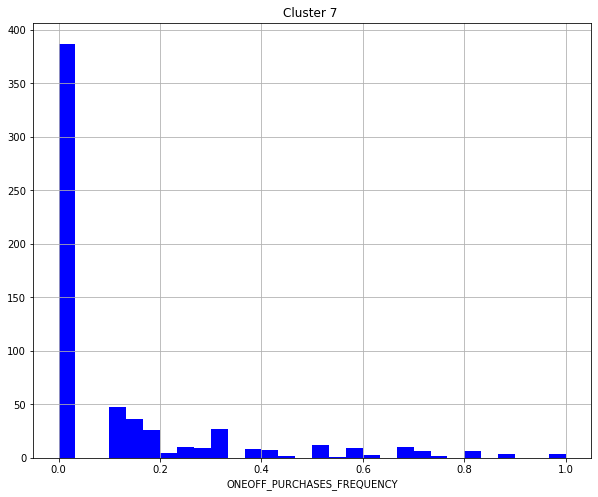

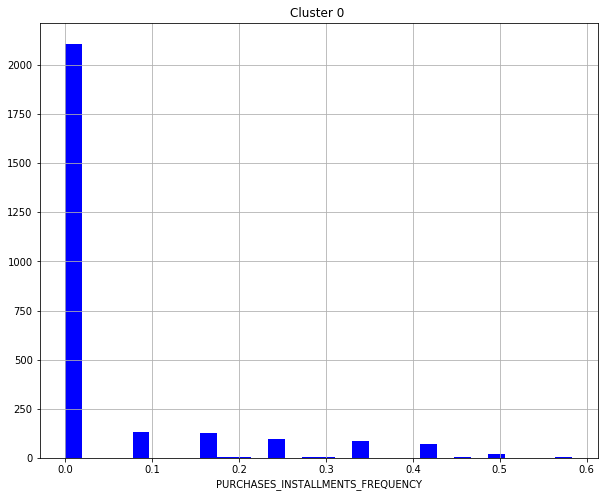

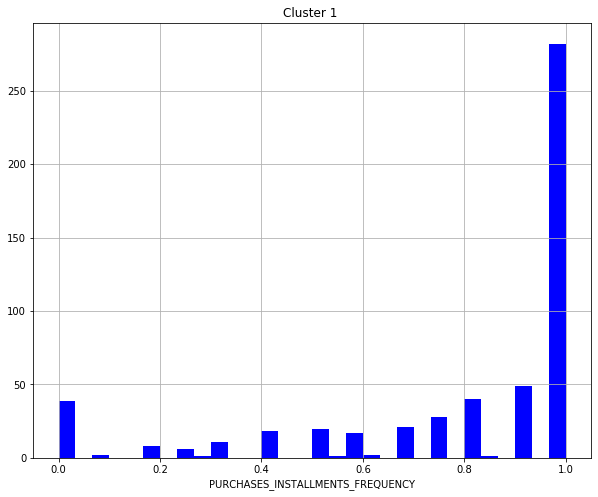

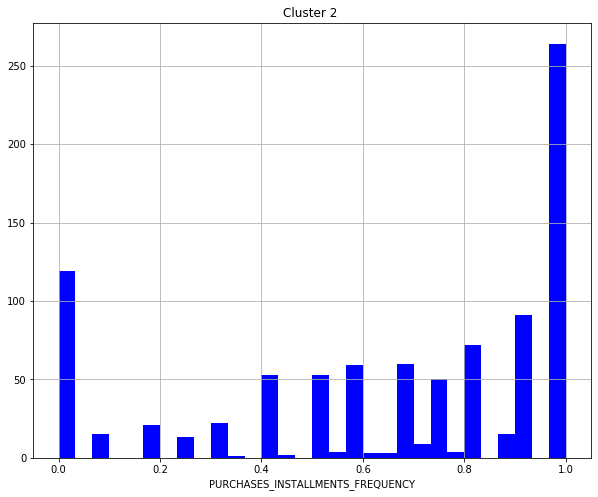

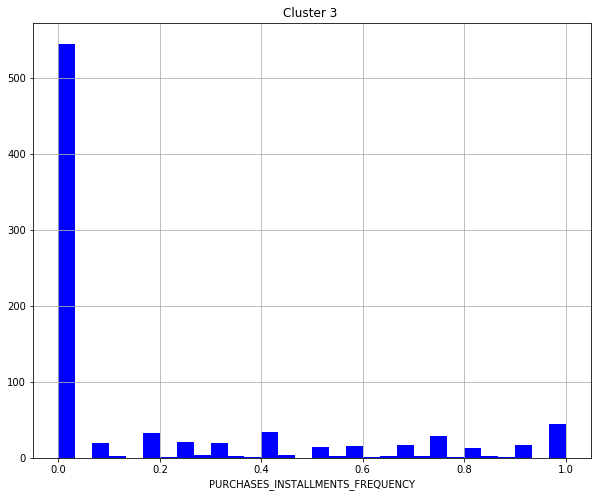

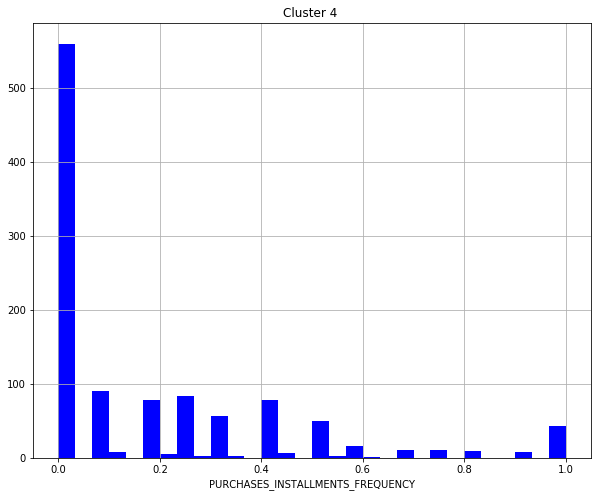

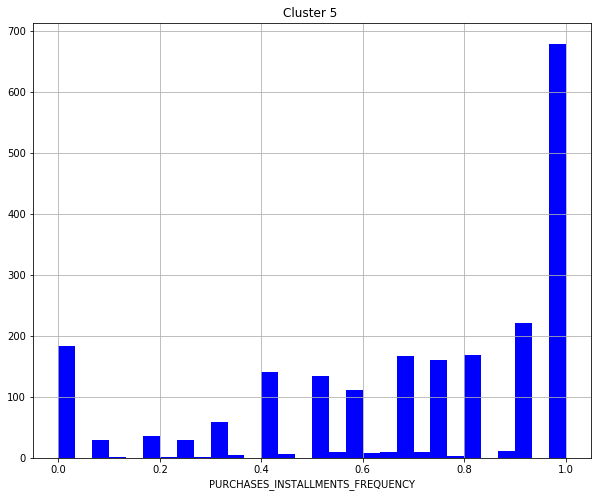

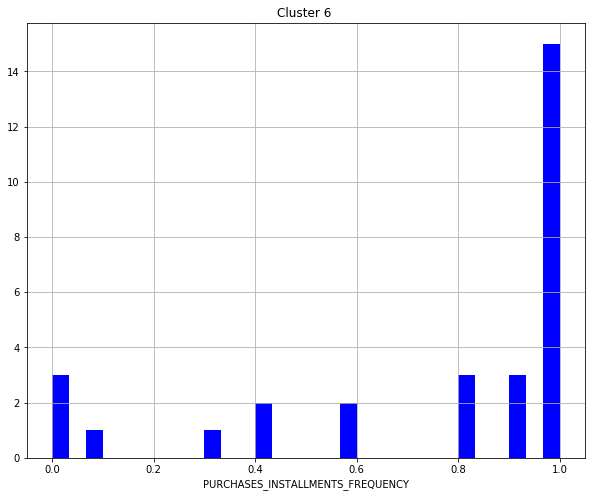

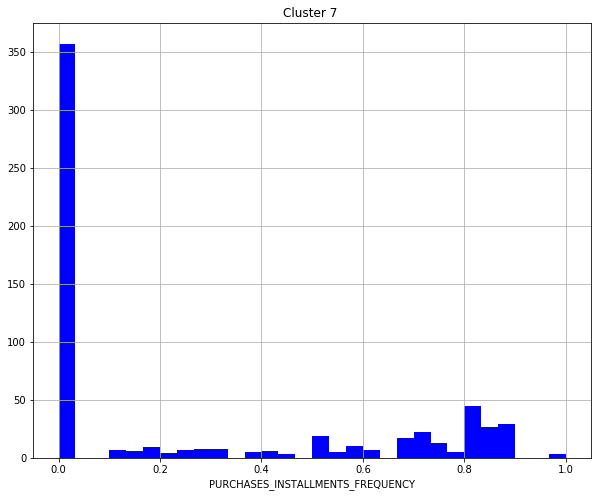

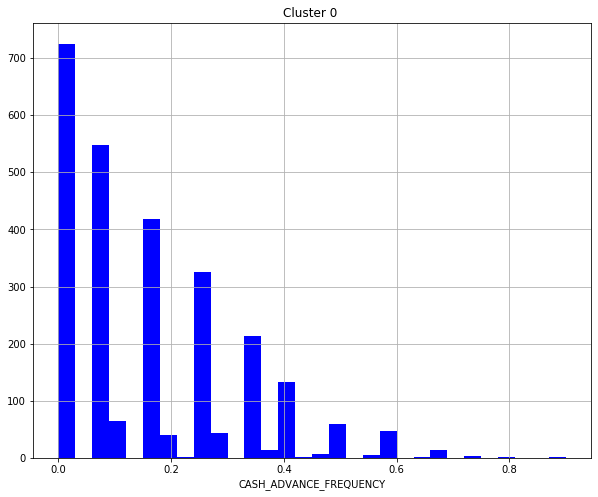

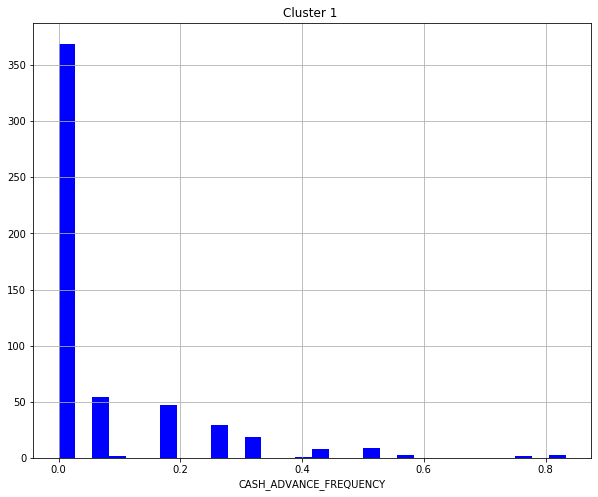

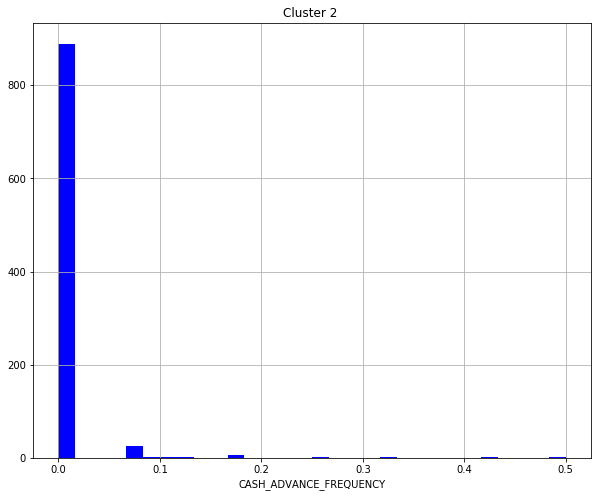

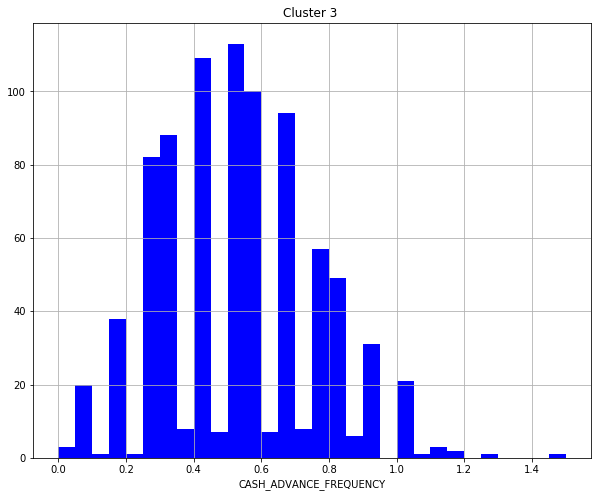

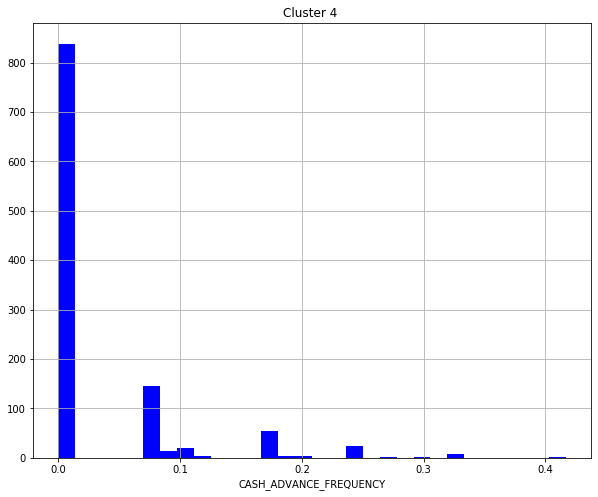

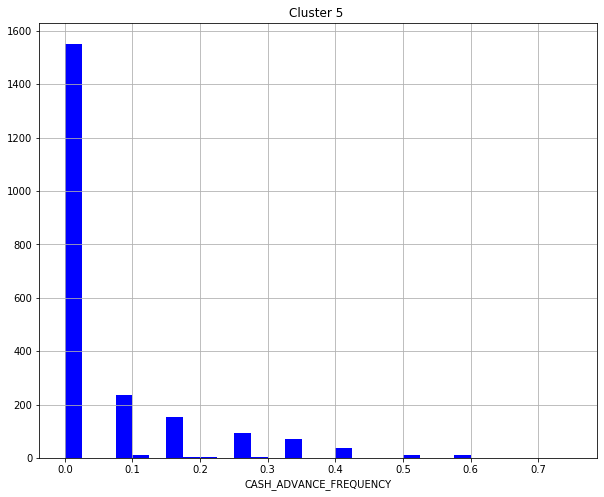

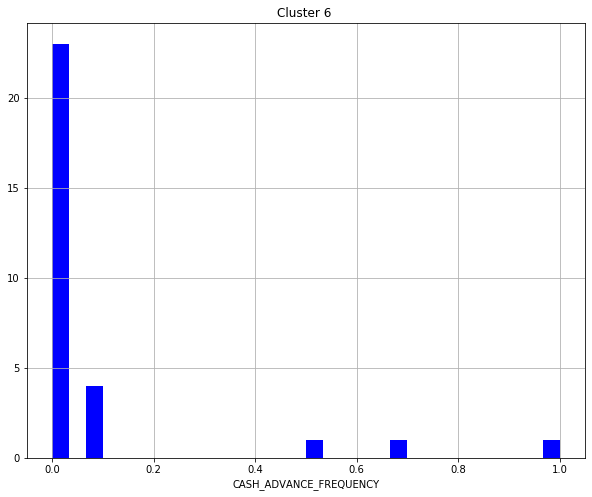

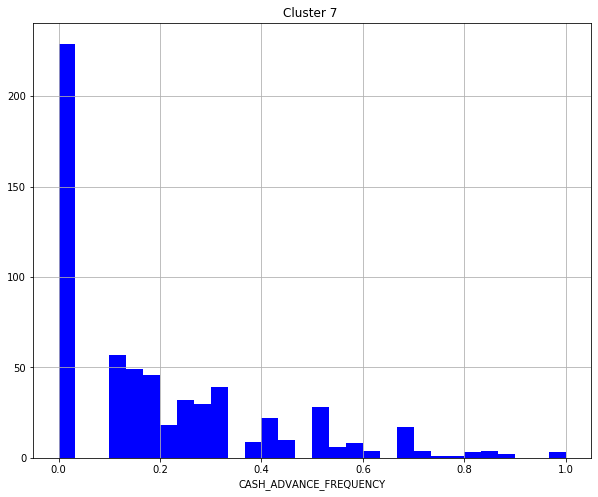

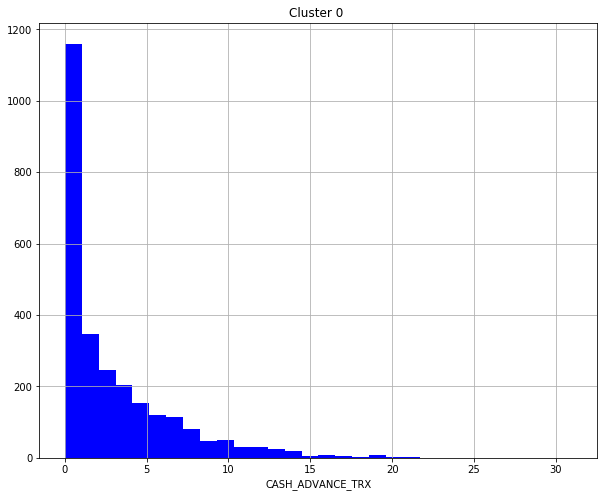

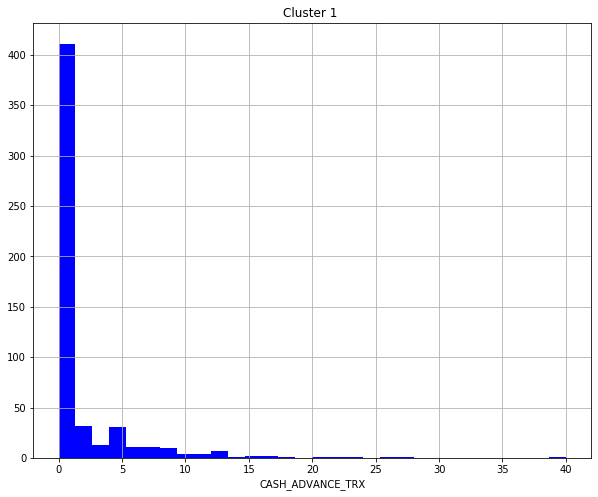

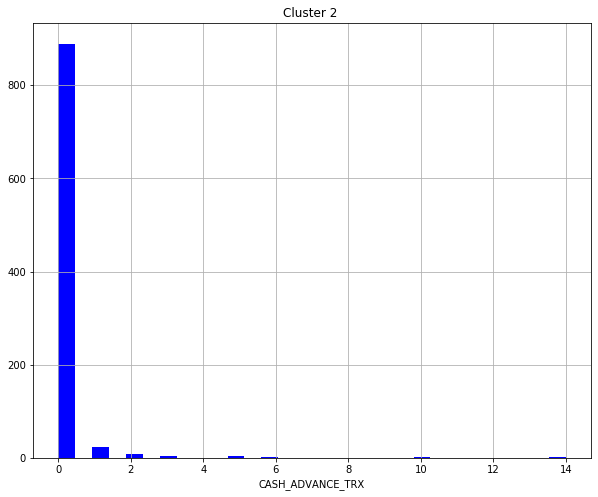

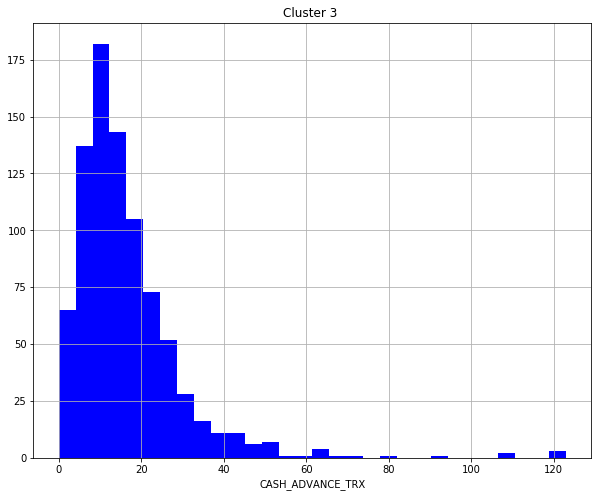

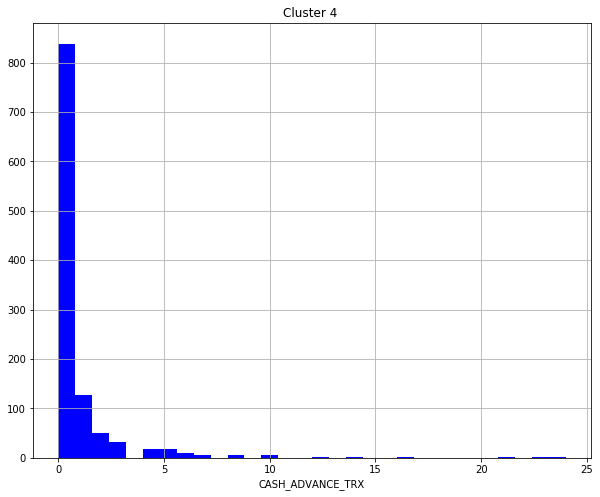

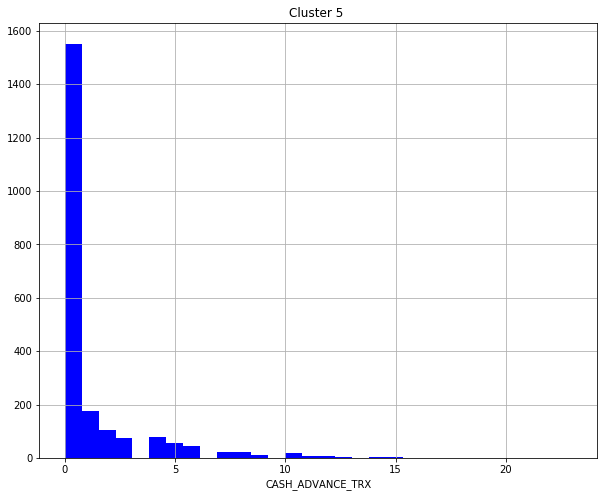

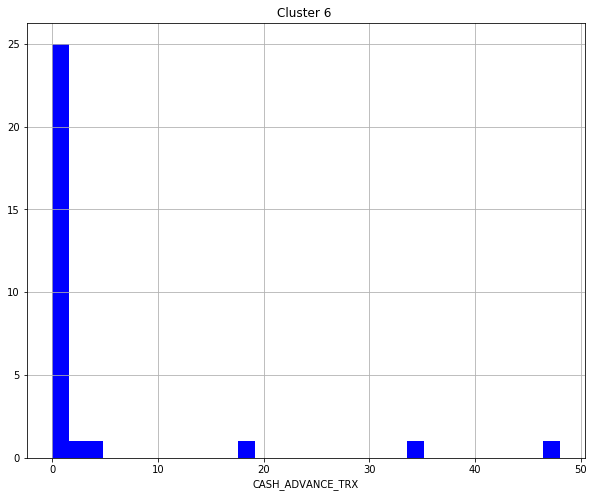

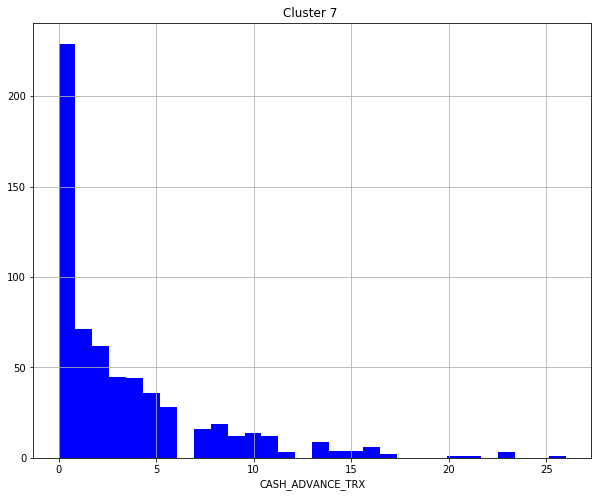

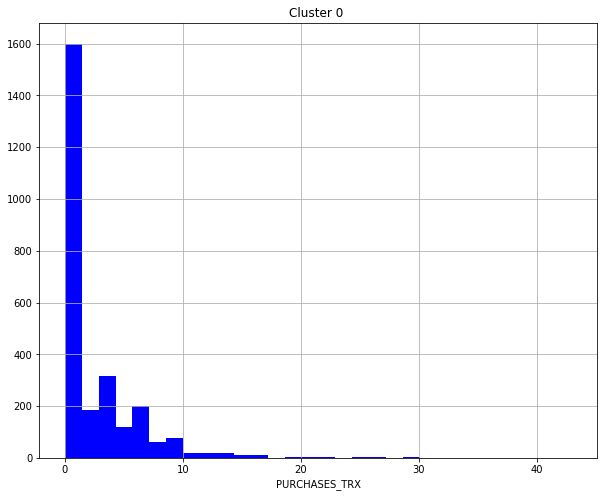

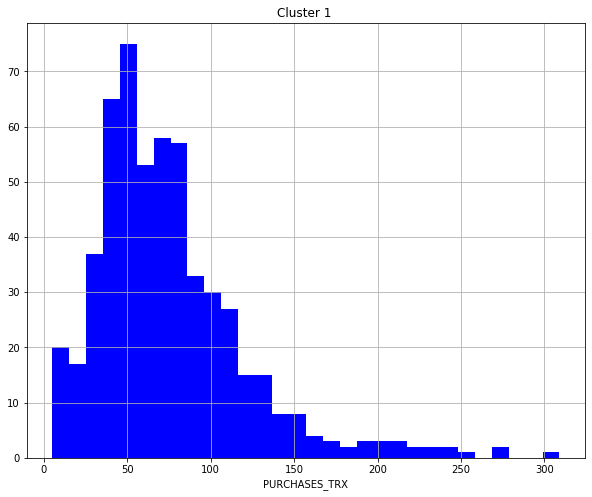

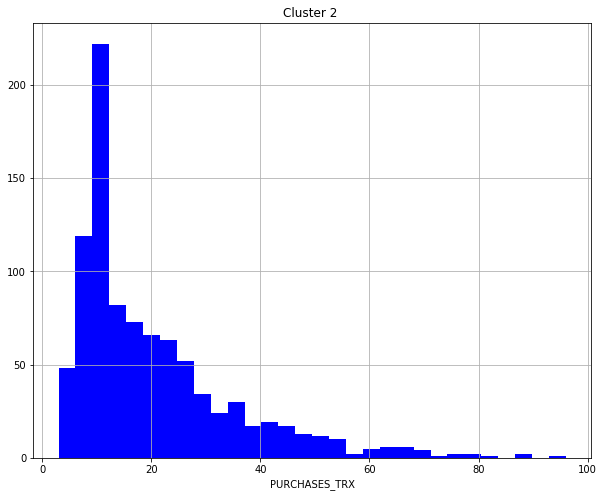

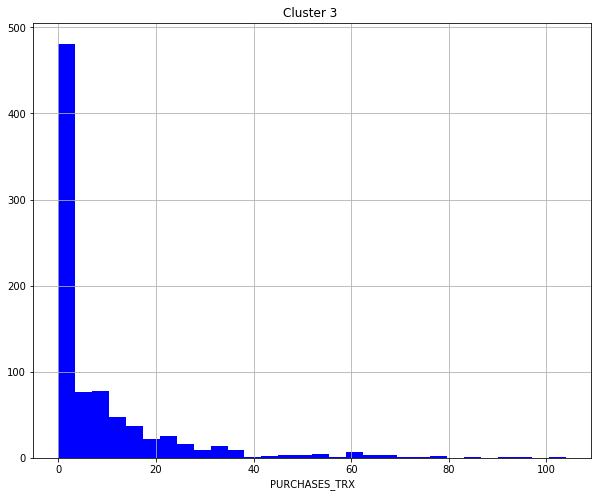

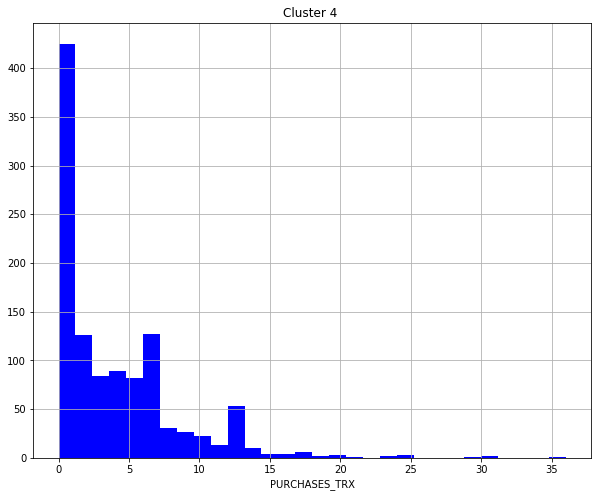

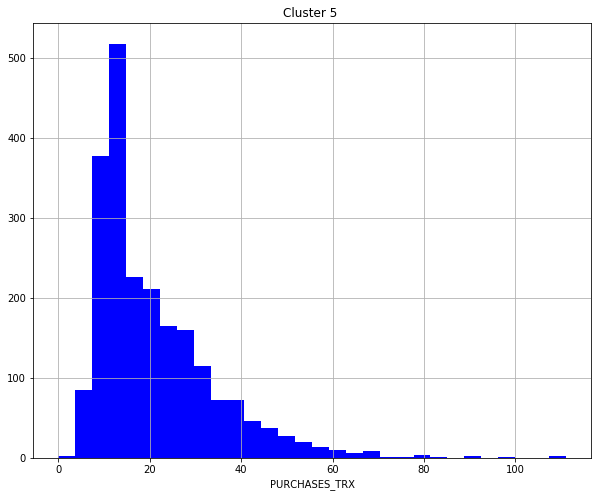

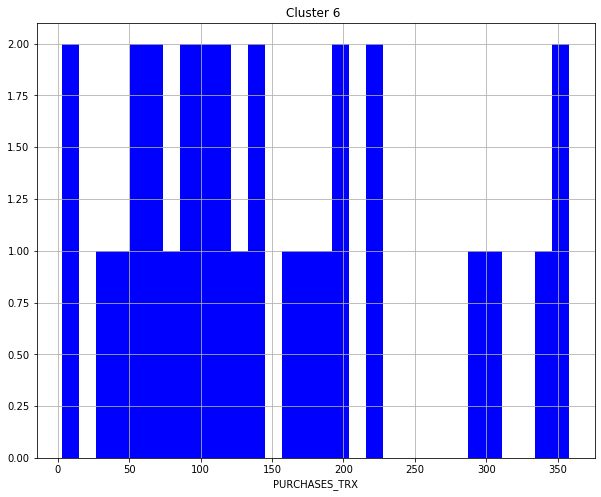

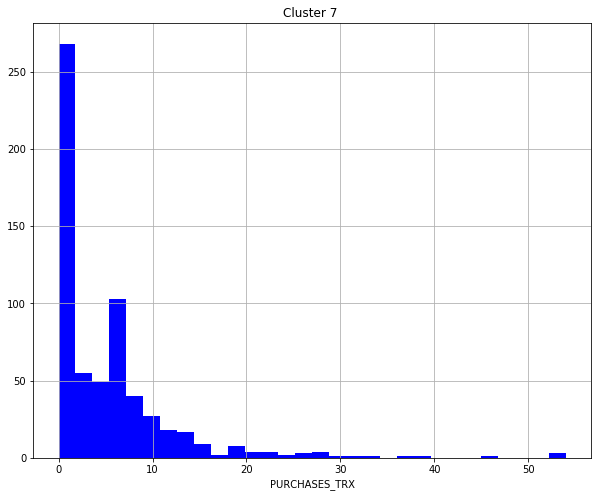

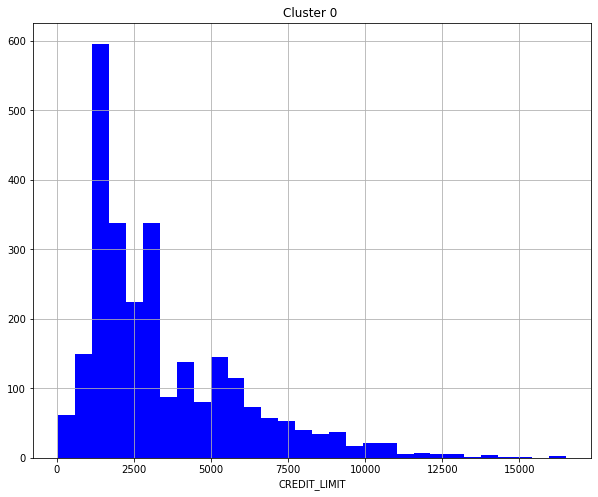

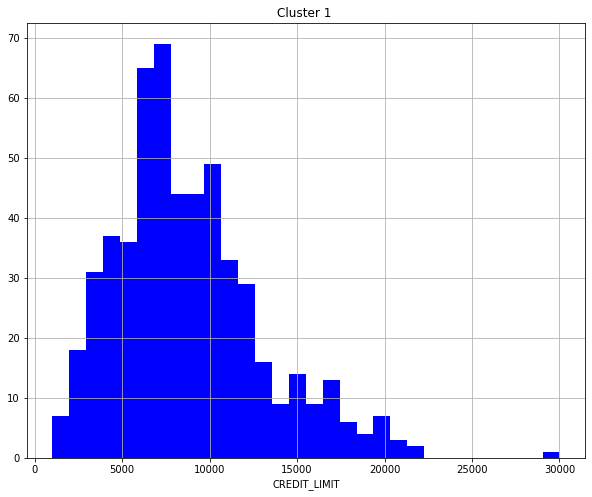

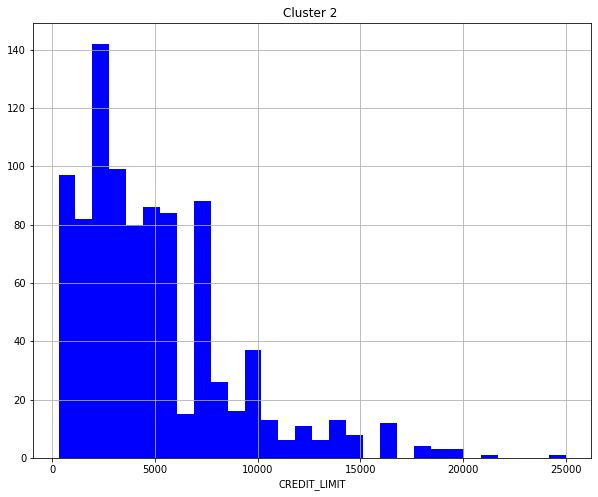

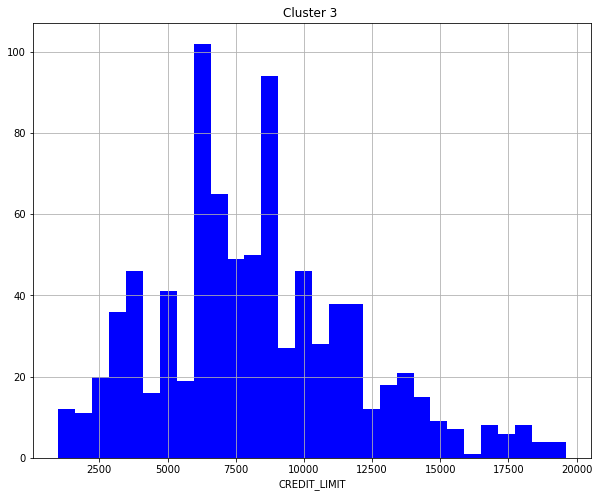

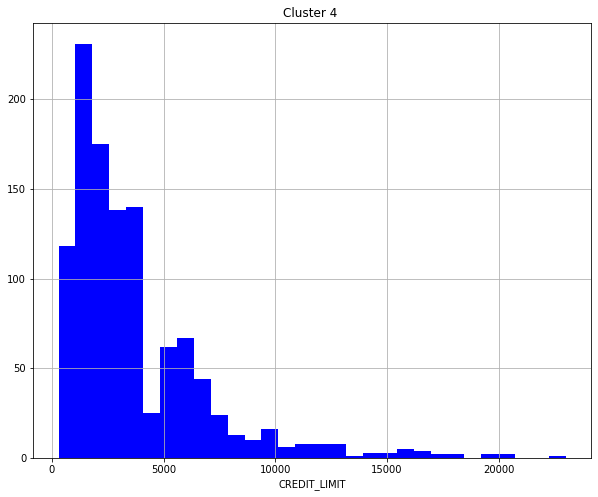

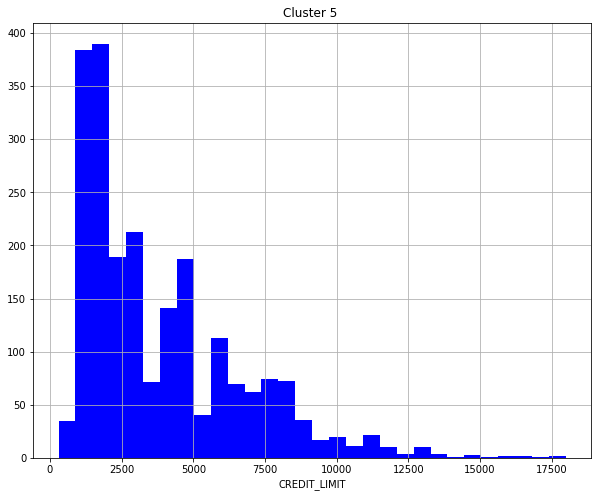

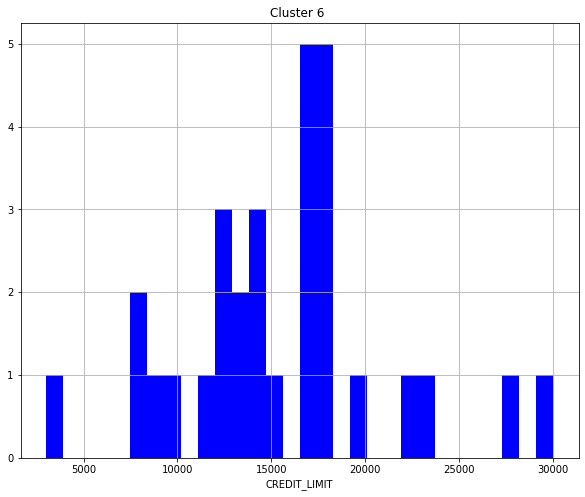

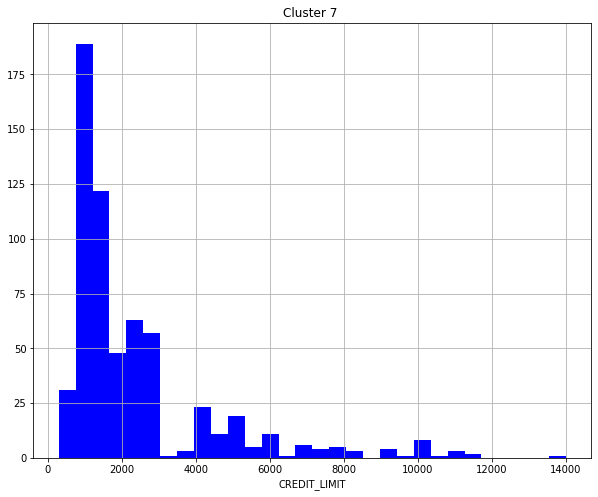

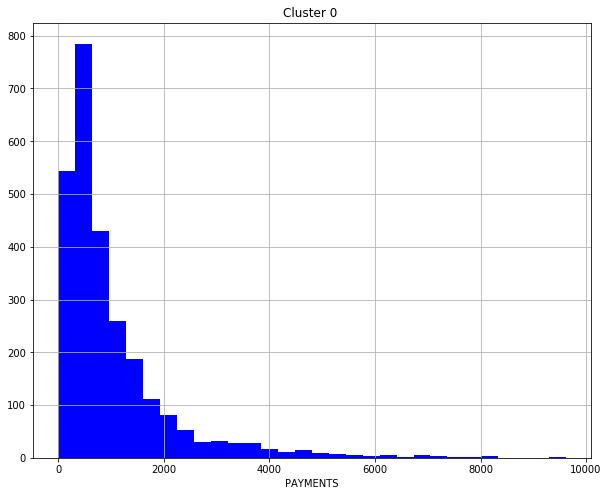

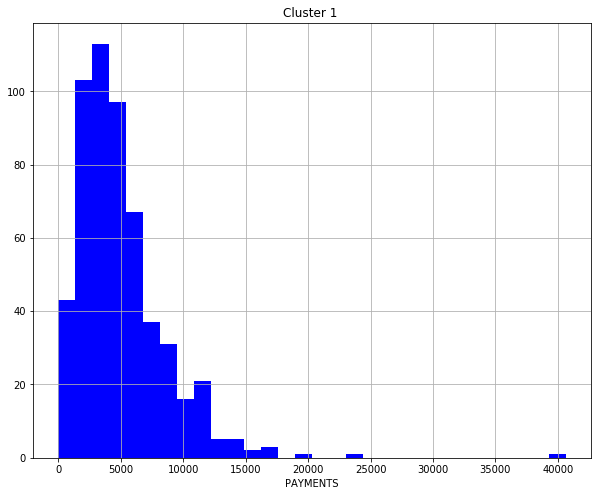

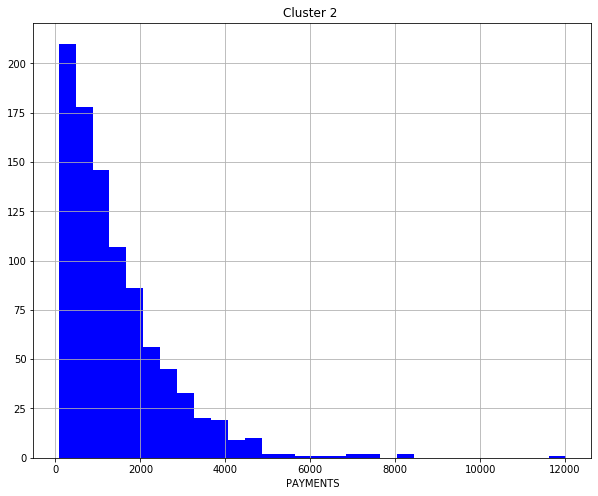

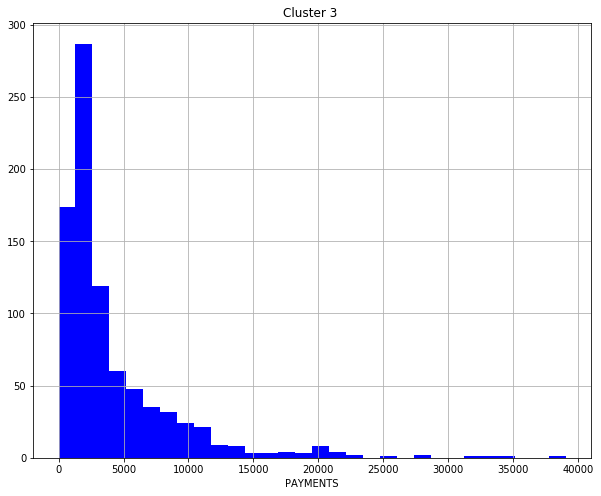

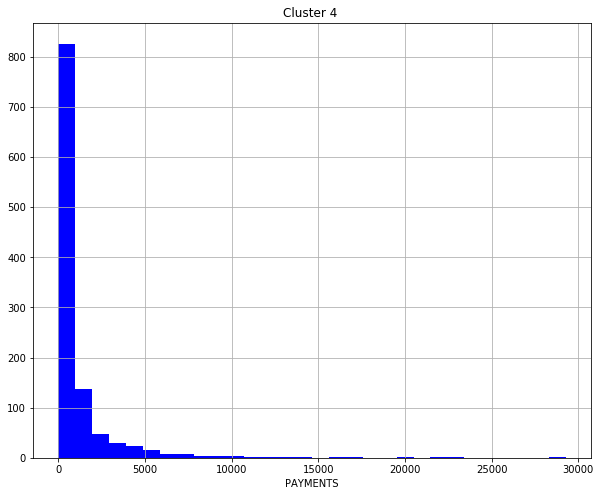

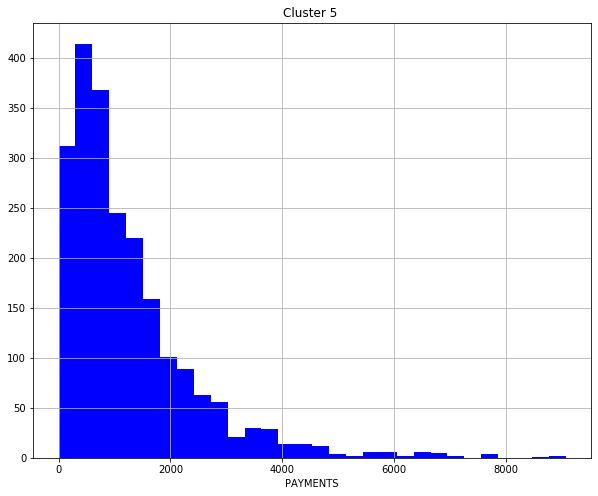

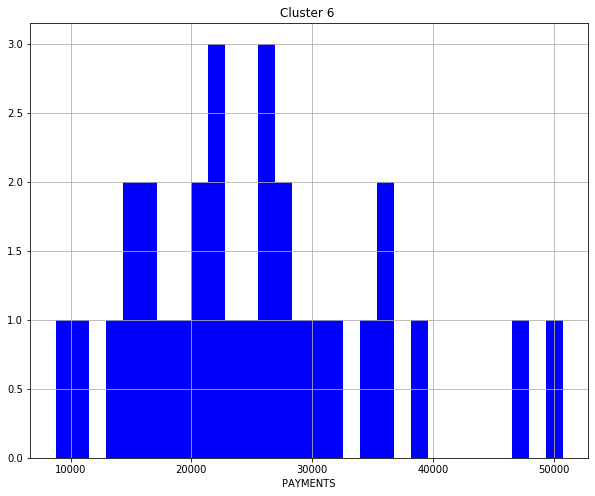

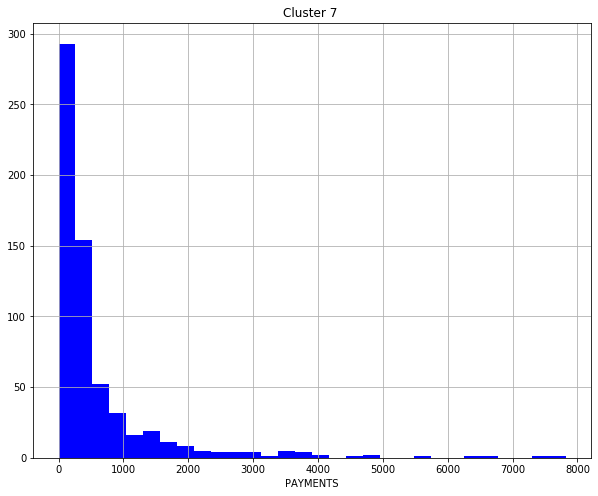

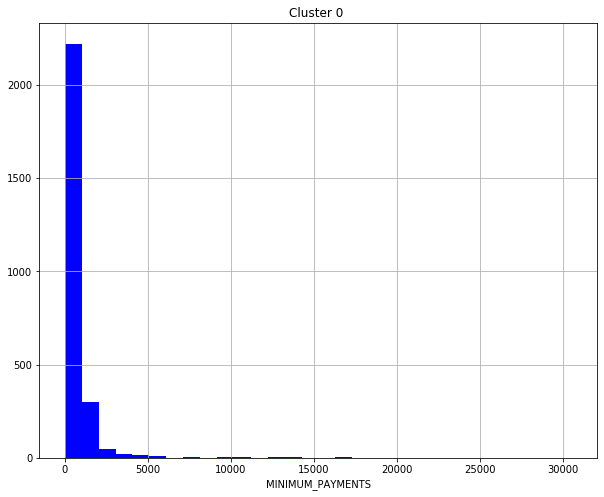

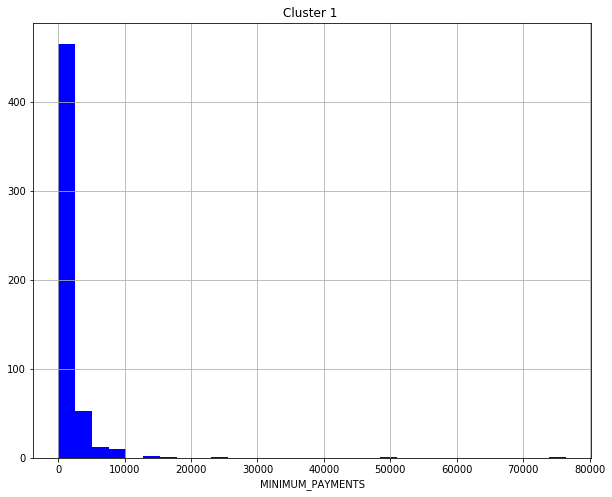

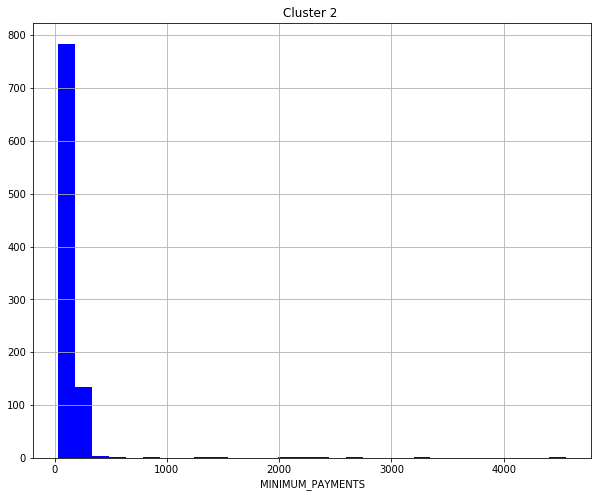

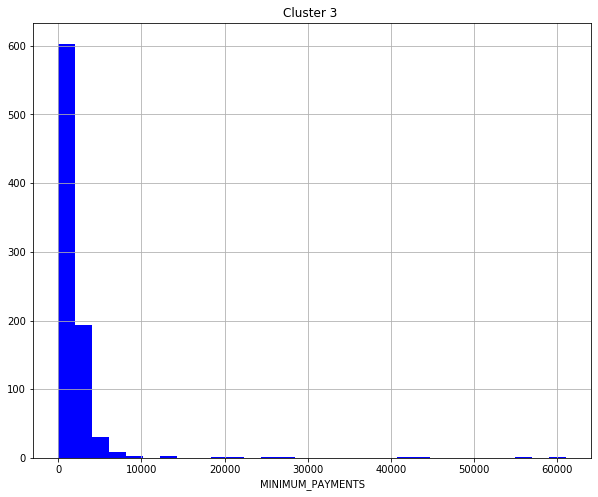

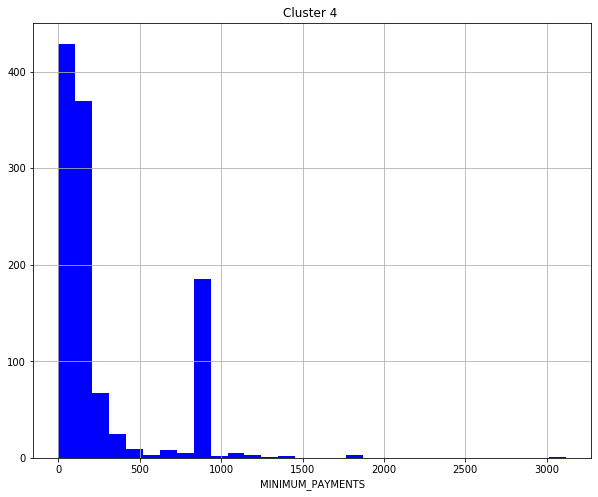

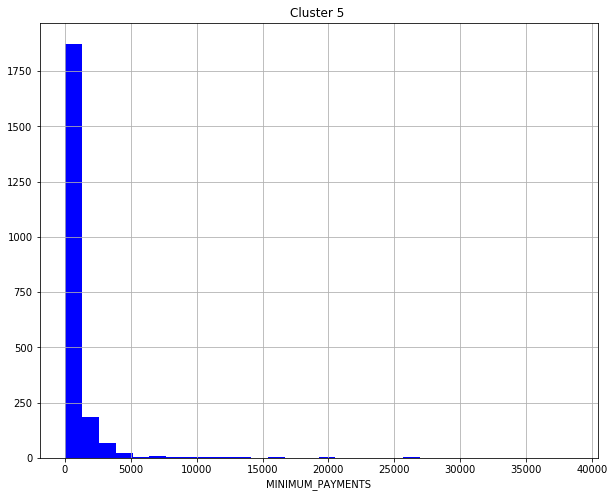

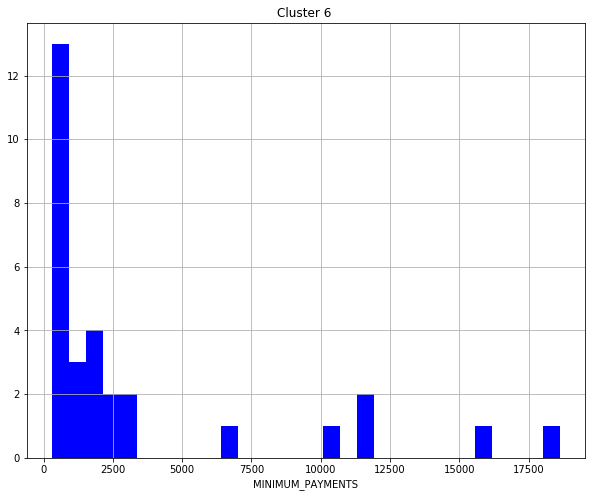

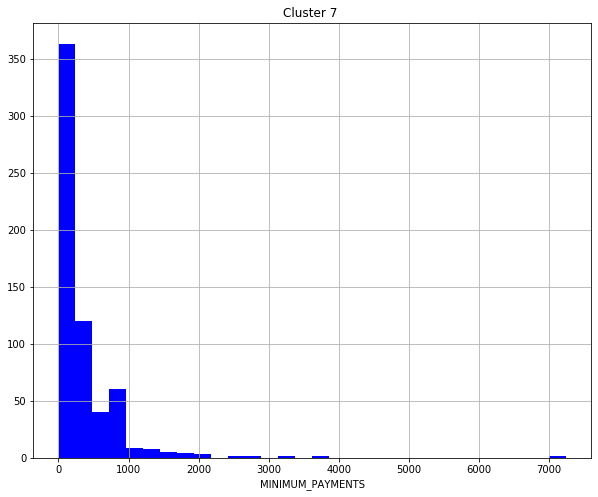

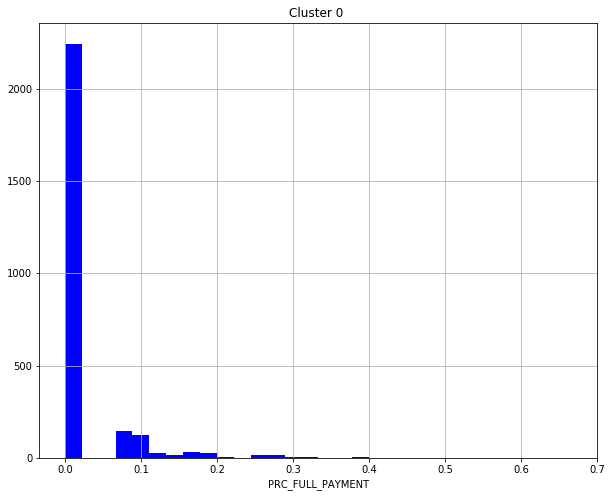

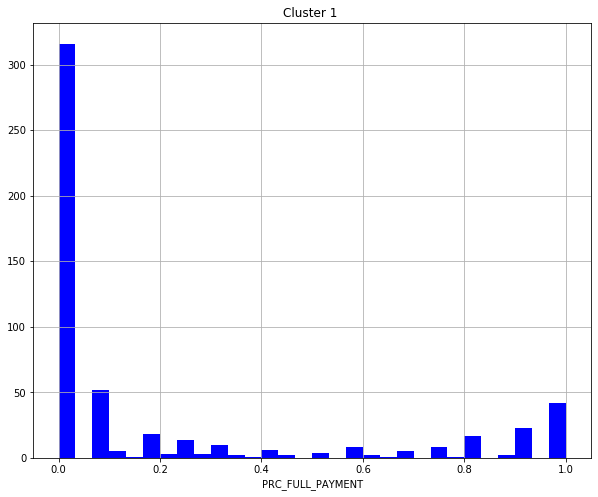

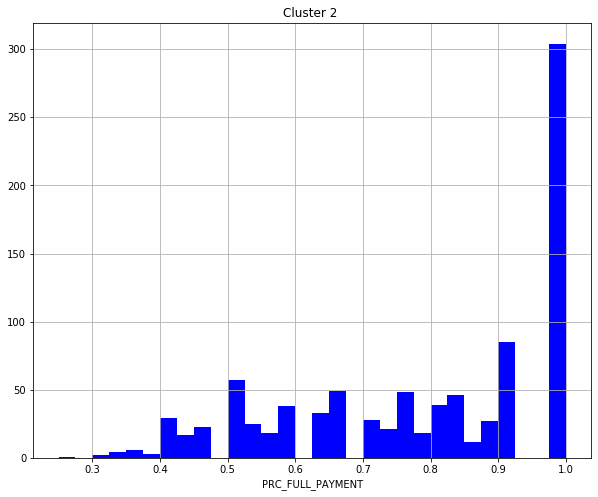

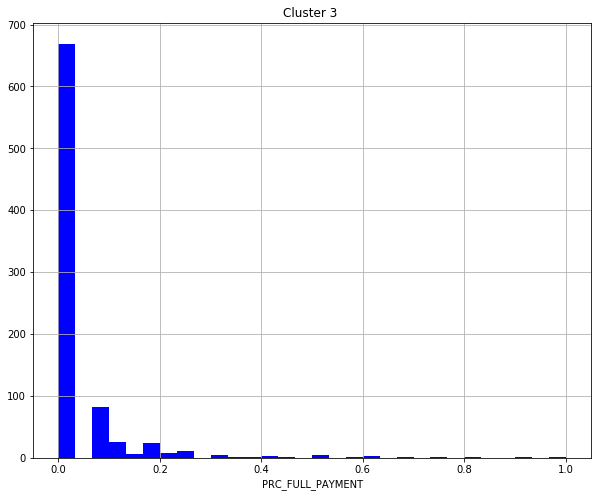

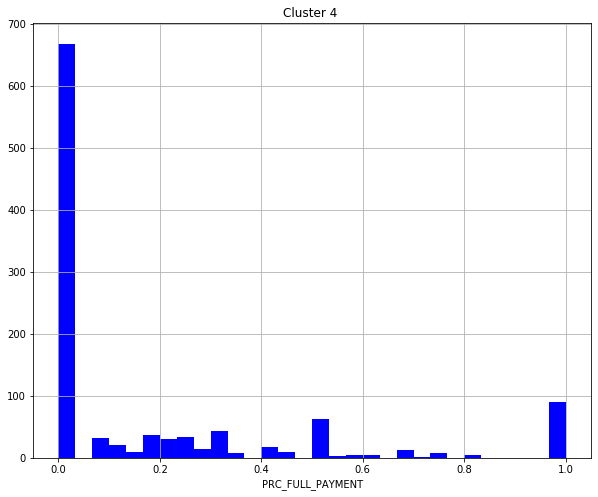

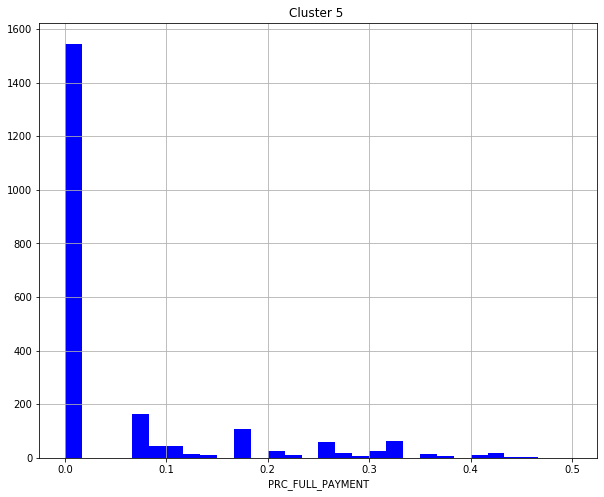

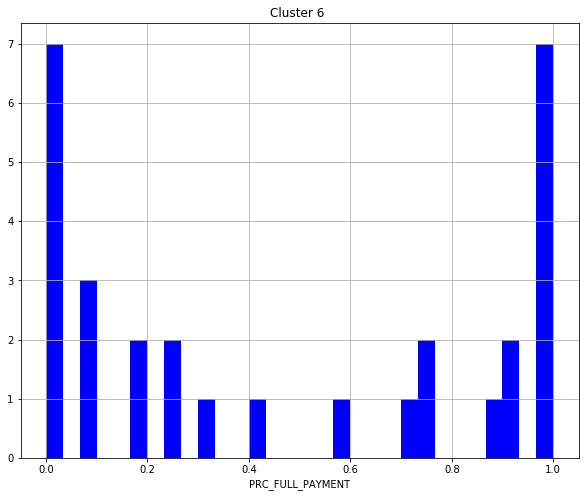

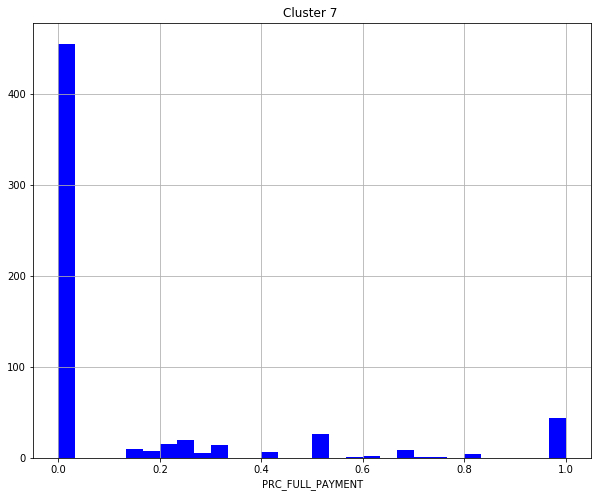

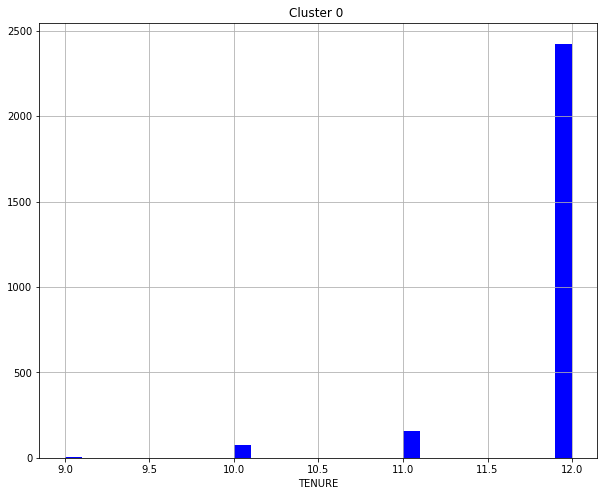

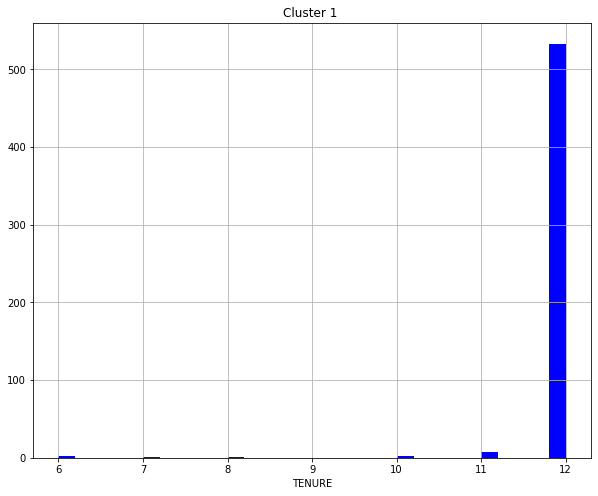

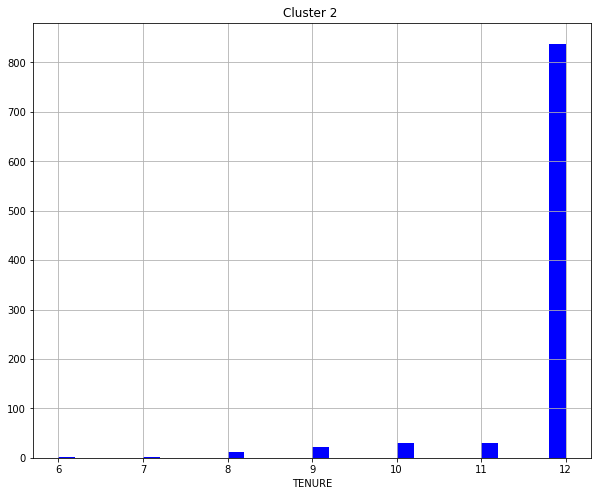

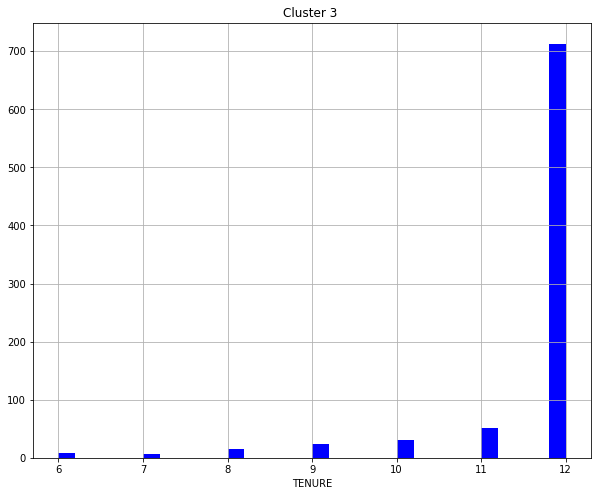

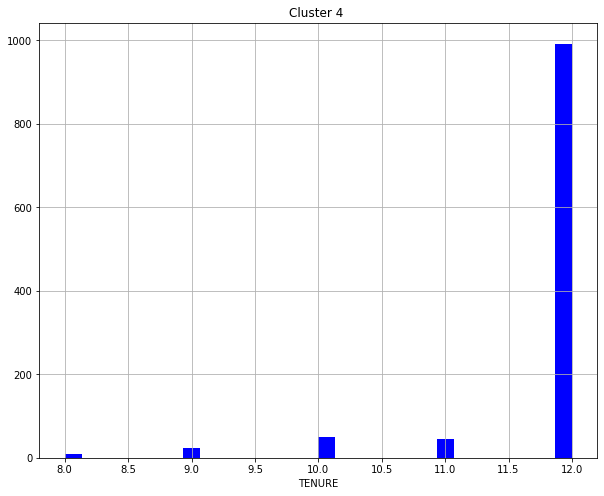

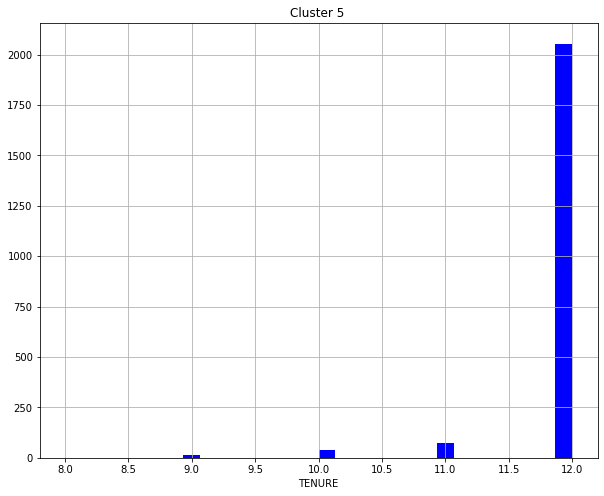

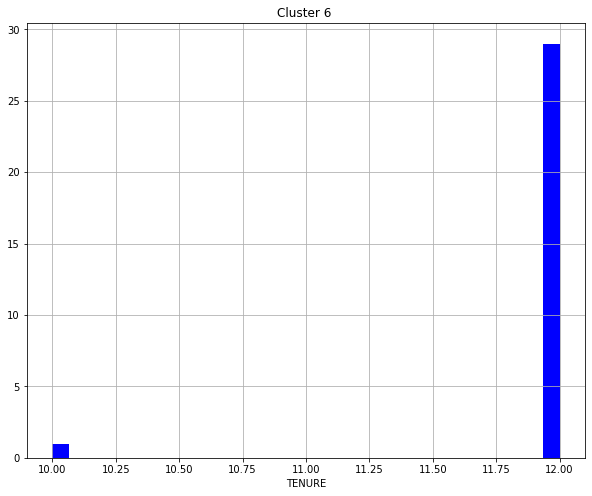

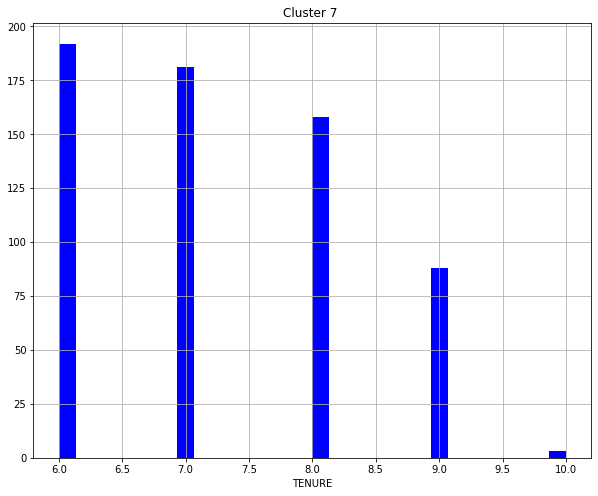

In [154]:
for i  in (df.columns) :
    for j in range(8):
        cluster = df_cluster[df_cluster['Cluster number'] == j]
        cluster[i].hist(bins = 30,figsize=(10,8),color='b')
        
        plt.title('Cluster {} '.format(j))
        plt.xlabel(i)
        plt.show()

# PCA:

In [222]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=pca_comp,columns=['PCA1','PCA2'])
df_pca

,PCA1,PCA2
0,-1.682223,-1.076451
1,-1.138301,2.506476
2,0.969686,-0.383524
3,-0.873632,0.043166
4,-1.599435,-0.688581
...,...,...
8945,-0.359628,-2.016145
8946,-0.564371,-1.639122
8947,-0.926203,-1.810785
8948,-2.336551,-0.657964


In [158]:
df_new=pd.concat([df_pca,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
df_new

,PCA1,PCA2,Cluster number
0,-1.682219,-1.076451,0
1,-1.138302,2.506484,3
2,0.969686,-0.383523,5
3,-0.873625,0.043168,0
4,-1.599433,-0.688582,0
...,...,...,...
8945,-0.359627,-2.016149,7
8946,-0.564360,-1.639127,7
8947,-0.926200,-1.810789,7
8948,-2.336549,-0.657969,7


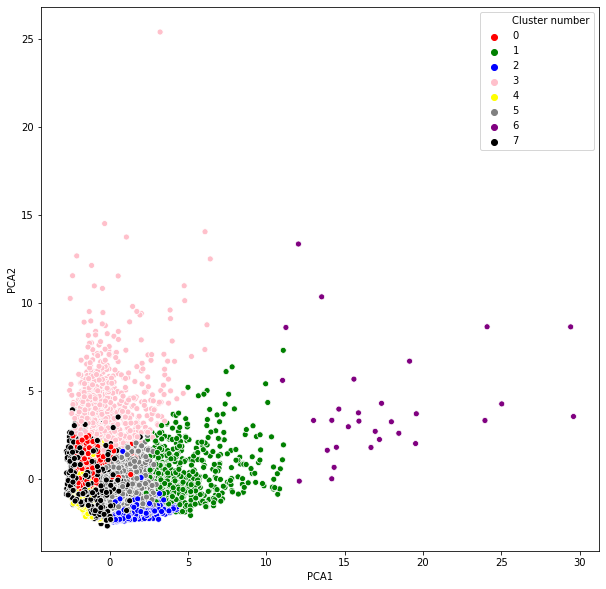

In [226]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster number", data = df_new, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# Agglomerative Clustering:

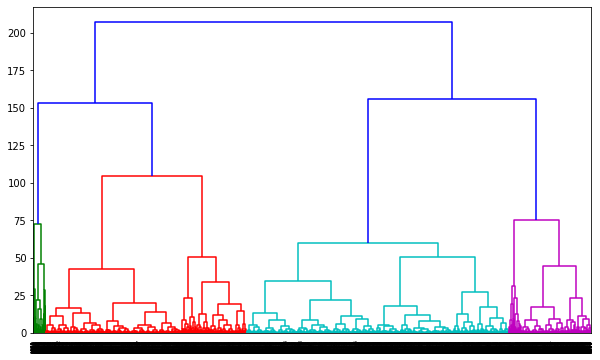

In [217]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(df_pca, method ='ward'))) 
#visualizing dendogram

In [224]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

sil_score=[]
for i in range(2,10):
    sil_score.append(silhouette_score(df_pca, AgglomerativeClustering(n_clusters = i).fit_predict(df_pca))) 
sil_score  


[0.489879397341982,
 0.4415768260784414,
 0.3567792946436374,
 0.3622317851971599,
 0.3619180922143386,
 0.3639771870201928,
 0.36853481133668325,
 0.37213884409763354]

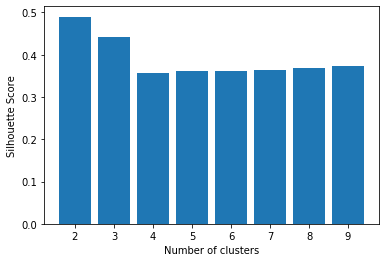

In [225]:
# Plotting a bar graph to compare the results  
plt.bar(range(2,10), sil_score) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 


In [227]:
agg_clust= AgglomerativeClustering(n_clusters=3)
agg_clust.fit_predict(df_pca)
agg_clust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

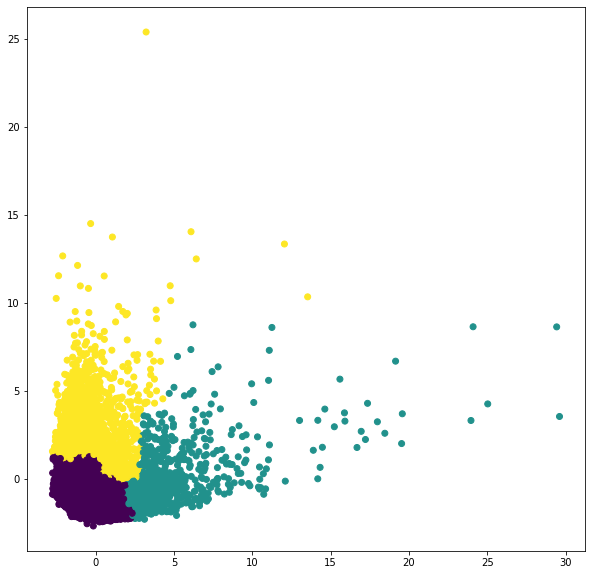

In [234]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PCA1'],df_pca['PCA2'],c=AgglomerativeClustering(n_clusters=3).fit_predict(df_pca))
plt.show()

# Autoencoders:

In [168]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [179]:
input_df = Input(shape=(17,))
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
#decoded layer
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)
# adam optimizer
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')
#train the autoencoder: we feed in the input and output as the same df_scaled
autoencoder.fit(df_scaled,df_scaled,batch_size= 128, epochs = 25,  verbose = 1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 4s 479us/sample - loss: 0.5511
Epoch 2/25
8950/8950 [==============================] - 2s 270us/sample - loss: 0.3184
Epoch 3/25
8950/8950 [==============================] - 2s 263us/sample - loss: 0.2333
Epoch 4/25
8950/8950 [==============================] - 2s 248us/sample - loss: 0.1959
Epoch 5/25
8950/8950 [==============================] - 2s 245us/sample - loss: 0.1623
Epoch 6/25
8950/8950 [==============================] - 2s 247us/sample - loss: 0.1505
Epoch 7/25
8950/8950 [==============================] - 2s 262us/sample - loss: 0.1452
Epoch 8/25
8950/8950 [==============================] - 2s 271us/sample - loss: 0.1271
Epoch 9/25
8950/8950 [==============================] - 3s 287us/sample - loss: 0.1153
Epoch 10/25
8950/8950 [==============================] - 2s 276us/sample - loss: 0.1044
Epoch 11/25
8950/8950 [==============================] - 2s 276us/sample - loss: 0.1001
Epoch 12/25
8950/89

In [180]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_21 (Dense)             (None, 2000)              2200

In [183]:
pred = encoder.predict(df_scaled)
pred.shape
# i went from 17 features to 10 features

(8950, 10)

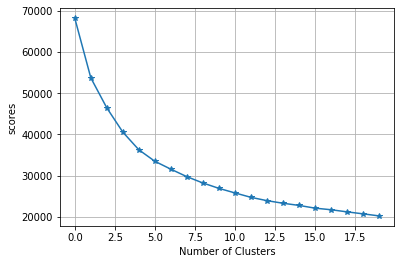

In [185]:
scores = []
for i in range(1,21):
    kmeans = KMeans(n_clusters= i).fit(pred)
    scores.append(kmeans.inertia_)

plt.plot(scores,marker='*')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('scores') 
plt.show()

In [187]:
kmeans= KMeans(n_clusters=5,random_state=0).fit(pred)

In [189]:
new_df_cluster=pd.concat([df,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
new_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster number
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [191]:
pca = PCA(n_components=2)
new_pca_comp = pca.fit_transform(pred)
new_df_pca=pd.DataFrame(data=new_pca_comp,columns=['PCA1','PCA2'])
pca_auto=pd.concat([new_df_pca,pd.DataFrame({'Cluster number':kmeans.labels_})],axis=1)
pca_auto

,PCA1,PCA2,Cluster number
0,-1.703050,0.147057,3
1,0.804559,-1.822323,4
2,0.101592,0.147437,3
3,-0.132007,-0.232261,3
4,-1.893264,0.015557,3
...,...,...,...
8945,0.349245,0.395881,1
8946,0.561731,-0.106498,1
8947,0.445162,-0.019590,1
8948,0.639730,-0.998306,1


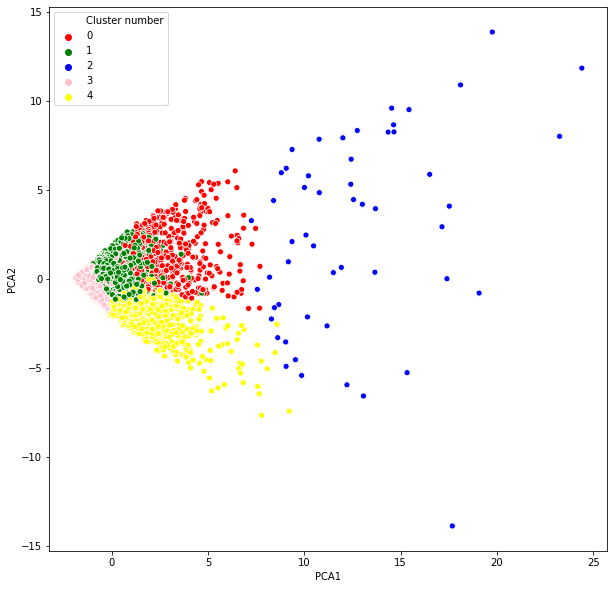

In [192]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster number", data = pca_auto, palette =['red','green','blue','pink','yellow'])
plt.show()